# Few short learning with Siamese Networks

This notebook tries to classify images using Siamese Networks proposed by ***Gregory et. al***, in his paper [Siamese Neural Networks for One-shot Image Recognition](http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf), to solve the **One shot learning** problem.

This notebook uses a deep convolutional neural network (CNN) to extract features from input images. [Keras](https://keras.io/) is used for implementing the CNN.

In the modern in which we live in Deep Learning has changed the way we use technology.

- Mobile applications like Google Photos with automatic Face Detection.
- Snapchat.
- Google Assistant/Siri.

All of these remarkable break throughs have been made possible by the power of Deep Learning.

Automatic face and tag detectionon on Facebook, every time we upload new image, has been made possible by training Deep Learning models on large amount of data.

Deep Learning models are performing so good in the current scenario because of the amount of data that is being generated each day. 


<img src="https://cdn-images-1.medium.com/max/800/1*ZX05x1xYgaVoa4Vn2kKS9g.png"></img>
<caption><center> <u> <font color='black'> **Figure 1** </u></center></caption>


Traditional Machine Learning approaches worked like the top half of the picture above. You would have to design a feature extraction algorithm which generally involved a lot of heavy mathematics (complex design), wasn’t very efficient, and didn’t perform too well at all (accuracy level just wasn’t suitable for real-world applications). After doing all of that you would also have to design a whole classification model to classify your input given the extracted features.

These models also fail to work with high dimensional data due to curse of dimensionality, in other words in high dimensional like Images, when fed into traditional machine learning models take a lot of time to find the right set of hyperparameters, though the number of hyperparameters is small but the number of feature space is so large that it will take a lot of time to train traditional machine learning models on such feature space.

Deep Learning on the other hand, using Neural Network architectures has been able to solve this problem.


## Few shot learning

One of the main requisites of highly accurate deep learning models is large amount of data.
The set of hyperparameters a Deep Model need to be tuned are very large, and the amount of data needed to get the right set of value for these hyperparameters is also large.

But what if we need an automated system, which can successfully classify images to various classes given the data for each image class is quite less.

**Few shot learning** is such a problem.
We can **Few shot learning** as a problem to classify data into K classes where each class has only few examples.
The paper written by [Gregory et. al](http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf), suggest ideas for building a Neural Network Architecture to solve this problem.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQThMusu8b2uK8kGwrFsg-cuZXaN8Wc7HkfgyiM-8YAfCfN_2uiJQ"></img>
<caption><center> <u> <font color='black'> **Figure 2** </u></center></caption>
The above image has been chosen from the Coursera course on Deep Learning by DeepLearning.ai
    
    
Machine learning has been successfully used to achieve state-ofthe-art
performance in a variety of applications such as
web search, spam detection, caption generation, and speech
and image recognition. However, these algorithms often
break down when forced to make predictions about data for
which little supervised information is available. We desire
to generalize to these unfamiliar categories without necessitating
extensive retraining which may be either expensive
or impossible due to limited data or in an online prediction
setting, such as web retrieval.

One particularly interesting task is classification under the
restriction that we may only observe a single example of
each possible class before making a prediction about a test
instance. This is called one-shot learning and it is the primary
focus of our model presented in this work

In [104]:
!pip install scikit-image
!pip install tensorflow
!pip install keras
!pip install scipy==1.2
!pip install scikit-learn
!pip install opencv-python
!pip install h5py
!pip install matplotlib
!pip install imageio

/usr/local/lib64/python3.6/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/local/lib64/python3.6/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
  Using cached scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl (25.9 MB)
/usr/local/lib64/python3.6/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/local/lib64/python3.6/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installat

/usr/local/lib64/python3.6/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/local/lib64/python3.6/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
/usr/local/lib64/python3.6/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/local/lib64/python3.6/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
  Using cached scipy

In [1]:
# Import Keras and other Deep Learning dependencies
from keras.models import Sequential
import time
from keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
import seaborn as sns
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from sklearn.preprocessing import LabelBinarizer
from keras.optimizers import *
from keras.engine.topology import Layer
from keras import backend as K
from keras.regularizers import l2
K.set_image_data_format('channels_last')
import cv2
import os
import sys
from skimage import io
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
from fr_utils import *
from inception_blocks_v2 import *
import numpy.random as rng
from sklearn.utils import shuffle

%matplotlib inline
%load_ext autoreload
%reload_ext autoreload

%aimport

#np.set_printoptions(threshold=np.nan)
np.set_printoptions(threshold=sys.maxsize)

Modules to reload:


Modules to skip:



In [71]:
# Check whether GPU is being or not
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17693432308422043082
]


In [2]:
data_path = os.path.join('data/')
train_folder = os.path.join(data_path,'images_background')
valpath = os.path.join(data_path,'images_evaluation')

In [3]:
base_class_name = 'character'

In [4]:
img = cv2.imread('data/images_background/Sanskrit/character11/0861_06.png')
print("Each image in the data set has a same of {0}".format(img.shape))
flattened_img = img.flatten()

print(flattened_img.shape)

print("The number of features in any image from the data set are: {0}".format(flattened_img.shape[0]))

Each image in the data set has a same of (105, 105, 3)
(33075,)
The number of features in any image from the data set are: 33075


In [5]:
def gen_class_names(base_class_name):
    classes = []
    for i in range(1,21):
        if i < 10:
            classes.append("{0}0{1}".format(base_class_name, i))
        else:
            classes.append("{0}{1}".format(base_class_name, i))
    return classes

In [6]:
classes = gen_class_names(base_class_name)

In [7]:
def generate_one_hot_encoding(classes):
    encoder = LabelBinarizer()
    transfomed_labels = encoder.fit_transform(classes)
    return transfomed_labels

In [8]:
labels = generate_one_hot_encoding(classes)

## Siamese Networks

Siamese network is a Deep Nueral Network architecture proposed by ***Gregory et. al*** in his paper [Siamese Neural Networks for One-shot Image Recognition](http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf), the paper proposes an architecture where using Convolutional Nueral Networks one can tackle the problem of One Shot Learning.

The model aims to solve the basic problem of **image verification**, given that we have very few samples of image of each class or category

The models aims to learn the embeddings of 2 separate images fed into the Nueral Network, the two embeddings are used to calculate the L1 distance between the 2 embeddings.
Once the distance embedding metric is calculated, the embedding is fed into a sigmoid unit which by the magic of back propogation, learns the correct set of hyperparameters to carry out the image verification.

<img src="https://sorenbouma.github.io/images/Siamese_diagram_2.png"></img>
<caption><center> <u> <font color='black'> **Figure 3**</font> </u></center></caption>


The model of Siamese network can be described as CNN architecture with 2 arms, a right arm and a left arm. The CNN architecture of a single arm has 9 layers, including Max Pooling and Convolutional layers of different filter sizes, as described in the paper. These 9 layers work as feature selectors for the CNN architecture. Convolutional layers are initialized with weights having **0 mean 0.01 standard deviation**, also the bias hyperparameter of the these layers is initialized with a **mean value of 0.5 and a standard deviation of 0.01**.

The basic intuition that once can gain from the paper is that it uses the L1 distance between the pixels of 2 different images as a metric of similarity.
 - If 2 images are similar the L1 distance between them will be lower as compared to the L1 distance computed for 2 somewhat different images.
 - The L1 distance computed is then used to train the sigmoid unit to find the write set of hyperparameters.

In [9]:
def initialize_weights(shape, name=None, dtype=None):
    """
        The paper, http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
        suggests to initialize CNN layer weights with mean as 0.0 and standard deviation of 0.01
    """
    return np.random.normal(loc = 0.0, scale = 1e-2, size = shape)

/home/hduser/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Plot of weights initialized, with mean of 0.0 and standard deviation of 0.01')

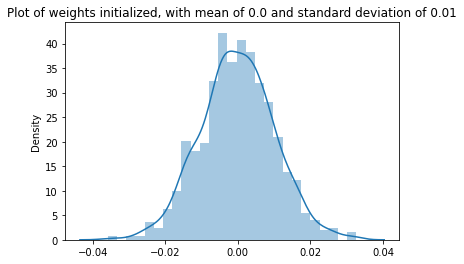

In [10]:
# Intialize bias with mean 0.0 and standard deviation of 10^-2
weights = initialize_weights((1000,1))
sns.distplot(weights)
plt.title("Plot of weights initialized, with mean of 0.0 and standard deviation of 0.01")

In [11]:
def initialize_bias(shape, name=None, dtype=None):
    """
        The paper, http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
        suggests to initialize CNN layer bias with mean as 0.5 and standard deviation of 0.01
    """
    return np.random.normal(loc = 0.5, scale = 1e-2, size = shape)

/home/hduser/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Plot of biases initialized, with mean of 0.0 and standard deviation of 0.01')

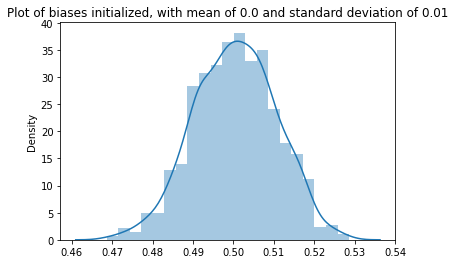

In [12]:
# Intialize bias with mean 0.5 and standard deviation of 10^-2
bias = initialize_bias((1000,1))
sns.distplot(bias)
plt.title("Plot of biases initialized, with mean of 0.0 and standard deviation of 0.01")

In [13]:
def get_siamese_model(input_shape):
    """
        Model architecture based on the one provided in: http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
    """
    left_input = Input(input_shape)
    right_input = Input(input_shape)
    model = Sequential()
    model.add(Conv2D(64, (10,10), activation='relu', input_shape=input_shape,
                   kernel_initializer=initialize_weights, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (7,7), activation='relu',
                     kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(256, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(Flatten())
    model.add(Dense(4096, activation='sigmoid',
                   kernel_regularizer=l2(1e-3),
                   kernel_initializer=initialize_weights,bias_initializer=initialize_bias))
    encoded_l = model(left_input)
    encoded_r = model(right_input)
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])
    prediction = Dense(1,activation='sigmoid',bias_initializer=initialize_bias)(L1_distance)
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)
    return siamese_net

In [14]:
model = get_siamese_model((105, 105, 1))
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 105, 105, 1) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 105, 105, 1) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 4096)         38947648    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 4096)         0           sequential[0][0]             

### Optimizing function and loss function
The training was initially done using Stochastic gradient descent(as described in the paper) with a learning rate 0.0005(choosen randomly between 0.01 and 0.00001) initially, due to which the convergence of model was very slow, after 3000 iterations the validation decreased from .47 to .43, where when the training was done using Adam's algorithm to optimize the training process even though with a smaller learning rate of 0.00006, the decrease in the validation loss was much faster as compared to simple Stochastic Gradient Descent.



In [15]:
optimizer = Adam(lr = 0.00006)
model.compile(loss="binary_crossentropy",optimizer=optimizer)

### Image Verification and Recognition

Image verification is the task to find whether 2 images fed as input belong to the class/person or category.
Image verification differs from Image Recognition, where in Image Verification is 1:1 classification problem and Image Recognition is a 1:K classifcation problem, where K is the total number of classes present.

**Image Verification**
In Image Verification, you're given two images and you have to tell if they are of the same person. The simplest way to do this is to compare the two images pixel-by-pixel. If the distance between the raw images are less than a chosen threshold, it may be the same person/class.

<img src="https://image.ibb.co/k3P0hJ/pixel_comparison.png" style="width:380px;height:150px;"></img>
<caption><center> <u> <font color='black'> **Figure 4**</font> </u></center></caption>
    
    




**Face Recognition**
Facial recognition is a biometric solution that measures unique characteristics about one’s face. Applications available today include flight checkin, tagging friends and family members in photos, and “tailored” advertising.

<img src="https://cdn-images-1.medium.com/max/800/1*wh1N-kogDMaZYS17lqyqeQ.jpeg"></img>
<caption><center> <u> <font color='black'> **Figure 5**</font> </u></center></caption>

## Dataset

<img src="https://cdn-images-1.medium.com/max/1600/1*fRd4Sc6cT0_KFm6IhB3Bqw.png"></img>
<caption><center> <u> <font color='black'> **Figure 6**</font> </u></center></caption>

To demonstrate few shot [Omniglot dataset](https://github.com/brendenlake/omniglot) is used, Omniglot of Lake et al. is a MNIST-like scribbles dataset with 1623 characters with 20 examples each. The large number of classes (characters) with relatively few data per class (20), makes this an ideal data set for testing few-shot classification.

The figures below show few of the samples from the dataset.

In [16]:
def plot_images(path):
    """
        Plot all 20 samples of a particular character of a language
    """
    f, axarr = plt.subplots(5,4, figsize=(10,10))
    images_list = []
    for image in os.listdir(path):
        image_path = os.path.join(path, image)
        img = cv2.imread(image_path)
        images_list.append(img)
    for i in range(5):
        for j in range(4):
            axarr[i,j].imshow(images_list.pop())

Arcadian language, 20 samples of the third character.


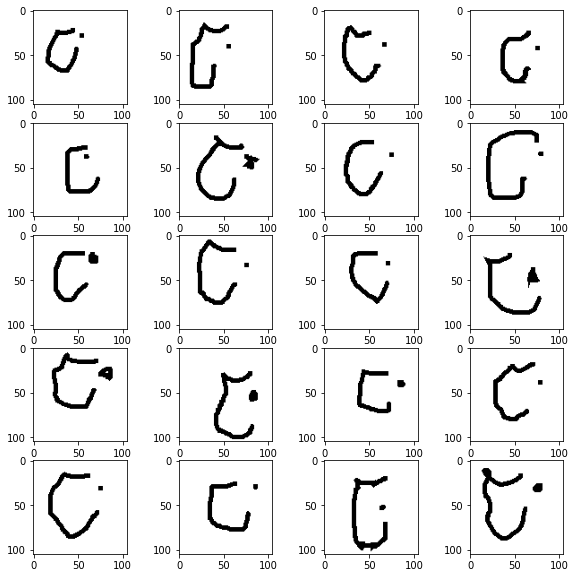

In [17]:
plot_images(os.path.join(data_path, 'images_background/Arcadian/character03/'))
print("Arcadian language, 20 samples of the third character.")

Korean language, 20 samples of the seventh character.


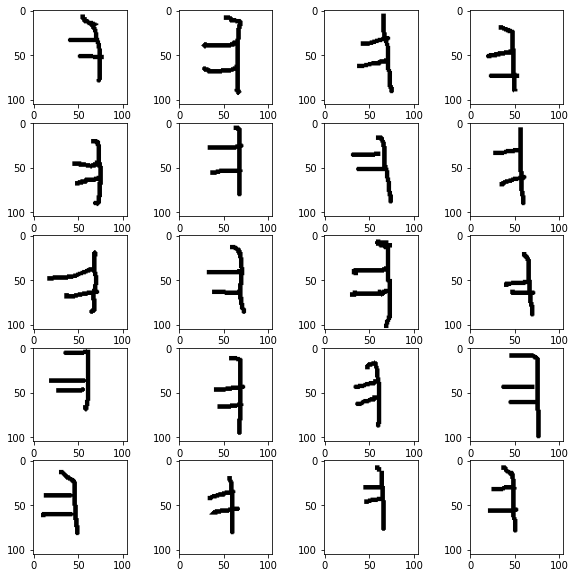

In [18]:
plot_images(os.path.join(data_path, 'images_background/Korean/character07/'))
print("Korean language, 20 samples of the seventh character.")

In [19]:
from load_data import *

loading alphabet: Alphabet_of_the_Magi
loading alphabet: Anglo-Saxon_Futhorc
loading alphabet: Arcadian
loading alphabet: Armenian
loading alphabet: Asomtavruli_(Georgian)
loading alphabet: Balinese
loading alphabet: Bengali
loading alphabet: Blackfoot_(Canadian_Aboriginal_Syllabics)
loading alphabet: Braille
loading alphabet: Burmese_(Myanmar)
loading alphabet: Cyrillic
loading alphabet: Early_Aramaic
loading alphabet: Futurama
loading alphabet: Grantha
loading alphabet: Greek
loading alphabet: Gujarati
loading alphabet: Hebrew
loading alphabet: Inuktitut_(Canadian_Aboriginal_Syllabics)
loading alphabet: Japanese_(hiragana)
loading alphabet: Japanese_(katakana)
loading alphabet: Korean
loading alphabet: Latin
loading alphabet: Malay_(Jawi_-_Arabic)
loading alphabet: Mkhedruli_(Georgian)
loading alphabet: N_Ko
loading alphabet: Ojibwe_(Canadian_Aboriginal_Syllabics)
loading alphabet: Sanskrit
loading alphabet: Syriac_(Estrangelo)
loading alphabet: Tagalog
loading alphabet: Tifinagh
loa

In [20]:
with open(os.path.join(data_path, "train.pickle"), "rb") as f:
    (X, classes) = pickle.load(f)

with open(os.path.join(data_path, "val.pickle"), "rb") as f:
    (Xval, val_classes) = pickle.load(f)
    
print("Training alphabets: \n")
print(list(classes.keys()))
print("Validation alphabets:", end="\n\n")
print(list(val_classes.keys()))

Training alphabets: 

['Alphabet_of_the_Magi', 'Anglo-Saxon_Futhorc', 'Arcadian', 'Armenian', 'Asomtavruli_(Georgian)', 'Balinese', 'Bengali', 'Blackfoot_(Canadian_Aboriginal_Syllabics)', 'Braille', 'Burmese_(Myanmar)', 'Cyrillic', 'Early_Aramaic', 'Futurama', 'Grantha', 'Greek', 'Gujarati', 'Hebrew', 'Inuktitut_(Canadian_Aboriginal_Syllabics)', 'Japanese_(hiragana)', 'Japanese_(katakana)', 'Korean', 'Latin', 'Malay_(Jawi_-_Arabic)', 'Mkhedruli_(Georgian)', 'N_Ko', 'Ojibwe_(Canadian_Aboriginal_Syllabics)', 'Sanskrit', 'Syriac_(Estrangelo)', 'Tagalog', 'Tifinagh']
Validation alphabets:

['Angelic', 'Atemayar_Qelisayer', 'Atlantean', 'Aurek-Besh', 'Avesta', 'Ge_ez', 'Glagolitic', 'Gurmukhi', 'Kannada', 'Keble', 'Malayalam', 'Manipuri', 'Mongolian', 'Old_Church_Slavonic_(Cyrillic)', 'Oriya', 'Sylheti', 'Syriac_(Serto)', 'Tengwar', 'Tibetan', 'ULOG']


### Training pipeline

In [21]:
class Siamese_Loader:
    """For loading batches and testing tasks to a siamese net"""
    def __init__(self, path, data_subsets = ["train", "val"]):
        self.data = {}
        self.categories = {}
        self.info = {}
        
        for name in data_subsets:
            file_path = os.path.join(path, name + ".pickle")
            print("loading data from {}".format(file_path))
            with open(file_path,"rb") as f:
                (X,c) = pickle.load(f)
                self.data[name] = X
                self.categories[name] = c

    def get_batch(self,batch_size,s="train"):
        """Create batch of n pairs, half same class, half different class"""
        X=self.data[s]
        n_classes, n_examples, w, h = X.shape

        #randomly sample several classes to use in the batch
        categories = rng.choice(n_classes,size=(batch_size,),replace=False)
        #initialize 2 empty arrays for the input image batch
        pairs=[np.zeros((batch_size, h, w,1)) for i in range(2)]
        #initialize vector for the targets, and make one half of it '1's, so 2nd half of batch has same class
        targets=np.zeros((batch_size,))
        targets[batch_size//2:] = 1
        for i in range(batch_size):
            category = categories[i]
            idx_1 = rng.randint(0, n_examples)
            pairs[0][i,:,:,:] = X[category, idx_1].reshape(w, h, 1)
            idx_2 = rng.randint(0, n_examples)
            #pick images of same class for 1st half, different for 2nd
            if i >= batch_size // 2:
                category_2 = category  
            else: 
                #add a random number to the category modulo n classes to ensure 2nd image has
                # ..different category
                category_2 = (category + rng.randint(1,n_classes)) % n_classes
            pairs[1][i,:,:,:] = X[category_2,idx_2].reshape(w, h,1)
        return pairs, targets
    
    def generate(self, batch_size, s="train"):
        """a generator for batches, so model.fit_generator can be used. """
        while True:
            pairs, targets = self.get_batch(batch_size,s)
            yield (pairs, targets)    

    def make_oneshot_task(self,N,s="val",language=None):
        """Create pairs of test image, support set for testing N way one-shot learning. """
        X=self.data[s]
        n_classes, n_examples, w, h = X.shape
        indices = rng.randint(0,n_examples,size=(N,))
        if language is not None:
            low, high = self.categories[s][language]
            if N > high - low:
                raise ValueError("This language ({}) has less than {} letters".format(language, N))
            categories = rng.choice(range(low,high),size=(N,),replace=False)
            
        else:#if no language specified just pick a bunch of random letters
            categories = rng.choice(range(n_classes),size=(N,),replace=False)            
        true_category = categories[0]
        ex1, ex2 = rng.choice(n_examples,replace=False,size=(2,))
        test_image = np.asarray([X[true_category,ex1,:,:]]*N).reshape(N, w, h,1)
        support_set = X[categories,indices,:,:]
        support_set[0,:,:] = X[true_category,ex2]
        support_set = support_set.reshape(N, w, h,1)
        targets = np.zeros((N,))
        targets[0] = 1
        targets, test_image, support_set = shuffle(targets, test_image, support_set)
        pairs = [test_image,support_set]

        return pairs, targets
    
    def test_oneshot(self,model,N,k,s="val",verbose=0):
        """Test average N way oneshot learning accuracy of a siamese neural net over k one-shot tasks"""
        n_correct = 0
        if verbose:
            print("Evaluating model on {} random {} way one-shot learning tasks ... \n".format(k,N))
        for i in range(k):
            inputs, targets = self.make_oneshot_task(N,s)
            probs = model.predict(inputs)
            if np.argmax(probs) == np.argmax(targets):
                n_correct+=1
        percent_correct = (100.0*n_correct / k)
        if verbose:
            print("Got an average of {}% {} way one-shot learning accuracy \n".format(percent_correct,N))
        return percent_correct
    
    def train(self, model, epochs, verbosity):
        model.fit_generator(self.generate(batch_size))
    

loader = Siamese_Loader(data_path)

loading data from data/train.pickle
loading data from data/val.pickle


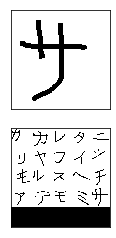

In [22]:
def concat_images(X):
    """Concatenates a bunch of images into a big matrix for plotting purposes."""
    nc, h , w, _ = X.shape
    X = X.reshape(nc, h, w)
    n = np.ceil(np.sqrt(nc)).astype("int8")
    img = np.zeros((n*w,n*h))
    x = 0
    y = 0
    for example in range(nc):
        img[x*w:(x+1)*w,y*h:(y+1)*h] = X[example]
        y += 1
        if y >= n:
            y = 0
            x += 1
    return img


def plot_oneshot_task(pairs):
    fig,(ax1,ax2) = plt.subplots(2)
    ax1.matshow(pairs[0][0].reshape(105,105), cmap='gray')
    img = concat_images(pairs[1])
    ax1.get_yaxis().set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax2.matshow(img,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

pairs, targets = loader.make_oneshot_task(20,"train","Japanese_(katakana)")
plot_oneshot_task(pairs)

In [ ]:
evaluate_every = 10 # interval for evaluating on one-shot tasks
loss_every = 20 # interval for printing loss (iterations)
batch_size = 32
n_iter = 20000
N_way = 20 # how many classes for testing one-shot tasks>
n_val = 250 # how many one-shot tasks to validate on?
best = -1
print("Starting training process!")
print("-------------------------------------")
t_start = time.time()
weights_path_2 = os.path.join(data_path, "model_weights.h5")
for i in range(1, n_iter):
    (inputs,targets)=loader.get_batch(batch_size)
    loss=model.train_on_batch(inputs,targets)
    print("\n ------------- \n")
    print("Loss: {0}".format(loss)) 
    if i % evaluate_every == 0:
        print("Time for {0} iterations: {1}".format(i, time.time()-t_start))
        val_acc = loader.test_oneshot(model,N_way,n_val,verbose=True)
        if val_acc >= best:
            print("Current best: {0}, previous best: {1}".format(val_acc, best))
            print("Saving weights to: {0} \n".format(weights_path_2))
            model.save_weights(weights_path_2)
            best=val_acc
    
    if i % loss_every == 0:
        print("iteration {}, training loss: {:.2f},".format(i,loss))

        

model.load_weights(weights_path_2)

Starting training process!
-------------------------------------

 ------------- 

Loss: 4.52699613571167

 ------------- 

Loss: 4.459147930145264

 ------------- 

Loss: 4.444833755493164

 ------------- 

Loss: 4.435742378234863

 ------------- 

Loss: 4.417735576629639

 ------------- 

Loss: 4.350634574890137

 ------------- 

Loss: 4.360359191894531

 ------------- 

Loss: 4.329617977142334

 ------------- 

Loss: 4.312252998352051

 ------------- 

Loss: 4.2671380043029785
Time for 10 iterations: 17.949867248535156
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 34.8% 20 way one-shot learning accuracy 

Current best: 34.8, previous best: -1
Saving weights to: data/model_weights.h5 


 ------------- 

Loss: 4.262556552886963

 ------------- 

Loss: 4.247241973876953

 ------------- 

Loss: 4.252106666564941

 ------------- 

Loss: 4.243095397949219

 ------------- 

Loss: 4.2034173011779785

 ------------- 

Loss: 4.142107009887695

 --------


 ------------- 

Loss: 2.7905678749084473

 ------------- 

Loss: 2.6721389293670654

 ------------- 

Loss: 2.7224419116973877

 ------------- 

Loss: 2.681236743927002

 ------------- 

Loss: 2.722902774810791

 ------------- 

Loss: 2.5920629501342773

 ------------- 

Loss: 2.783113956451416

 ------------- 

Loss: 2.7165908813476562

 ------------- 

Loss: 2.69507098197937
Time for 140 iterations: 935.303111076355
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 23.6% 20 way one-shot learning accuracy 

iteration 140, training loss: 2.70,

 ------------- 

Loss: 2.6931254863739014

 ------------- 

Loss: 2.6388094425201416

 ------------- 

Loss: 2.5554757118225098

 ------------- 

Loss: 2.6964709758758545

 ------------- 

Loss: 2.6809232234954834

 ------------- 

Loss: 2.5978212356567383

 ------------- 

Loss: 2.629481554031372

 ------------- 

Loss: 2.6933047771453857

 ------------- 

Loss: 2.7630252838134766

 ------------- 

Loss: 2.


 ------------- 

Loss: 2.067080497741699

 ------------- 

Loss: 2.0897817611694336

 ------------- 

Loss: 2.0620579719543457

 ------------- 

Loss: 2.116757869720459
Time for 270 iterations: 1858.6711797714233
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 31.2% 20 way one-shot learning accuracy 


 ------------- 

Loss: 2.0182485580444336

 ------------- 

Loss: 2.1128997802734375

 ------------- 

Loss: 2.0974457263946533

 ------------- 

Loss: 1.9953701496124268

 ------------- 

Loss: 2.0795159339904785

 ------------- 

Loss: 1.9986706972122192

 ------------- 

Loss: 2.0375375747680664

 ------------- 

Loss: 2.099405527114868

 ------------- 

Loss: 2.1464924812316895

 ------------- 

Loss: 2.020200252532959
Time for 280 iterations: 1929.6787269115448
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 35.2% 20 way one-shot learning accuracy 

iteration 280, training loss: 2.02,

 ------------- 

Loss


 ------------- 

Loss: 1.738174319267273

 ------------- 

Loss: 1.815786600112915

 ------------- 

Loss: 2.0301437377929688

 ------------- 

Loss: 1.953636884689331

 ------------- 

Loss: 1.7564018964767456
Time for 400 iterations: 2782.9556312561035
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 38.4% 20 way one-shot learning accuracy 

iteration 400, training loss: 1.76,

 ------------- 

Loss: 1.775468349456787

 ------------- 

Loss: 1.7981562614440918

 ------------- 

Loss: 1.6736968755722046

 ------------- 

Loss: 1.9325265884399414

 ------------- 

Loss: 1.6633003950119019

 ------------- 

Loss: 1.5918421745300293

 ------------- 

Loss: 1.7101925611495972

 ------------- 

Loss: 1.733902931213379

 ------------- 

Loss: 1.5829954147338867

 ------------- 

Loss: 1.7210149765014648
Time for 410 iterations: 2853.88028383255
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 34.0% 20 way one-shot le

iteration 520, training loss: 1.62,

 ------------- 

Loss: 1.497710943222046

 ------------- 

Loss: 1.3670883178710938

 ------------- 

Loss: 1.708649754524231

 ------------- 

Loss: 1.427994728088379

 ------------- 

Loss: 1.4077147245407104

 ------------- 

Loss: 1.4747436046600342

 ------------- 

Loss: 1.4961661100387573

 ------------- 

Loss: 1.5719022750854492

 ------------- 

Loss: 1.52976393699646

 ------------- 

Loss: 1.38326096534729
Time for 530 iterations: 3710.426584005356
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 38.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 1.7131471633911133

 ------------- 

Loss: 1.3496947288513184

 ------------- 

Loss: 1.4594511985778809

 ------------- 

Loss: 1.44803786277771

 ------------- 

Loss: 1.503135323524475

 ------------- 

Loss: 1.4149413108825684

 ------------- 

Loss: 1.5350964069366455

 ------------- 

Loss: 1.4431675672531128

 ------------- 

Loss: 1.319

Got an average of 44.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 1.3536170721054077

 ------------- 

Loss: 1.5222156047821045

 ------------- 

Loss: 1.2933993339538574

 ------------- 

Loss: 1.2243413925170898

 ------------- 

Loss: 1.2151246070861816

 ------------- 

Loss: 1.441970705986023

 ------------- 

Loss: 1.2164486646652222

 ------------- 

Loss: 1.2998429536819458

 ------------- 

Loss: 1.3807953596115112

 ------------- 

Loss: 1.2615952491760254
Time for 660 iterations: 4636.064721822739
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 55.6% 20 way one-shot learning accuracy 

Current best: 55.6, previous best: 54.4
Saving weights to: data/model_weights.h5 

iteration 660, training loss: 1.26,

 ------------- 

Loss: 1.2257059812545776

 ------------- 

Loss: 1.329430341720581

 ------------- 

Loss: 1.220884084701538

 ------------- 

Loss: 1.4455798864364624

 ------------- 

Loss: 1.2982971668243408

 ------

iteration 780, training loss: 1.44,

 ------------- 

Loss: 1.026205062866211

 ------------- 

Loss: 1.0911126136779785

 ------------- 

Loss: 1.097628116607666

 ------------- 

Loss: 1.169229507446289

 ------------- 

Loss: 1.0449944734573364

 ------------- 

Loss: 1.3288270235061646

 ------------- 

Loss: 1.2230576276779175

 ------------- 

Loss: 1.113987922668457

 ------------- 

Loss: 1.1368045806884766

 ------------- 

Loss: 1.2522661685943604
Time for 790 iterations: 5560.326057910919
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 56.8% 20 way one-shot learning accuracy 


 ------------- 

Loss: 1.0204137563705444

 ------------- 

Loss: 1.2587852478027344

 ------------- 

Loss: 1.1234509944915771

 ------------- 

Loss: 1.05350661277771

 ------------- 

Loss: 1.0424962043762207

 ------------- 

Loss: 1.052841067314148

 ------------- 

Loss: 1.21465265750885

 ------------- 

Loss: 1.1905323266983032

 ------------- 

Loss: 1.11


 ------------- 

Loss: 1.1053111553192139

 ------------- 

Loss: 1.1325011253356934

 ------------- 

Loss: 0.9727755784988403

 ------------- 

Loss: 1.055205225944519

 ------------- 

Loss: 0.9804015755653381

 ------------- 

Loss: 1.0511671304702759
Time for 920 iterations: 6483.921338558197
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 57.2% 20 way one-shot learning accuracy 

iteration 920, training loss: 1.05,

 ------------- 

Loss: 0.9586635231971741

 ------------- 

Loss: 1.0052471160888672

 ------------- 

Loss: 0.9780795574188232

 ------------- 

Loss: 1.2973535060882568

 ------------- 

Loss: 1.1400477886199951

 ------------- 

Loss: 1.010805606842041

 ------------- 

Loss: 1.0719430446624756

 ------------- 

Loss: 1.1297798156738281

 ------------- 

Loss: 1.0647528171539307

 ------------- 

Loss: 1.1518338918685913
Time for 930 iterations: 6554.739699840546
Evaluating model on 250 random 20 way one-shot learning tasks ..


 ------------- 

Loss: 1.0392942428588867

 ------------- 

Loss: 1.2662434577941895
Time for 1050 iterations: 7406.940158843994
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 54.0% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.9144284129142761

 ------------- 

Loss: 0.9271596074104309

 ------------- 

Loss: 0.8267712593078613

 ------------- 

Loss: 0.962323009967804

 ------------- 

Loss: 0.8898428678512573

 ------------- 

Loss: 1.0036206245422363

 ------------- 

Loss: 1.0568809509277344

 ------------- 

Loss: 0.8118281364440918

 ------------- 

Loss: 1.0707913637161255

 ------------- 

Loss: 0.9907559156417847
Time for 1060 iterations: 7477.889052867889
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 54.4% 20 way one-shot learning accuracy 

iteration 1060, training loss: 0.99,

 ------------- 

Loss: 0.9911258220672607

 ------------- 

Loss: 0.9834504723548889

 ------------- 




 ------------- 

Loss: 0.9381769895553589

 ------------- 

Loss: 0.8349154591560364

 ------------- 

Loss: 0.8236382007598877

 ------------- 

Loss: 0.8555904626846313
Time for 1180 iterations: 8329.799218893051
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 62.0% 20 way one-shot learning accuracy 

iteration 1180, training loss: 0.86,

 ------------- 

Loss: 0.8894051909446716

 ------------- 

Loss: 0.966248631477356

 ------------- 

Loss: 0.8181518912315369

 ------------- 

Loss: 0.837842583656311

 ------------- 

Loss: 1.0584452152252197

 ------------- 

Loss: 0.9648639559745789

 ------------- 

Loss: 0.9761744737625122

 ------------- 

Loss: 1.0479109287261963

 ------------- 

Loss: 0.9412826299667358

 ------------- 

Loss: 0.99809730052948
Time for 1190 iterations: 8400.757253170013
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 62.4% 20 way one-shot learning accuracy 


 ------------- 

Los


 ------------- 

Loss: 0.809089183807373

 ------------- 

Loss: 0.7116895318031311

 ------------- 

Loss: 0.9080057144165039

 ------------- 

Loss: 0.8723654747009277
Time for 1310 iterations: 9252.819780111313
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 61.2% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.7634100914001465

 ------------- 

Loss: 0.7690624594688416

 ------------- 

Loss: 0.8406944274902344

 ------------- 

Loss: 0.7762221097946167

 ------------- 

Loss: 0.8175973892211914

 ------------- 

Loss: 0.7364072799682617

 ------------- 

Loss: 0.9300655126571655

 ------------- 

Loss: 0.8074504137039185

 ------------- 

Loss: 0.9223304986953735

 ------------- 

Loss: 0.9623430371284485
Time for 1320 iterations: 9323.655703783035
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 65.2% 20 way one-shot learning accuracy 

iteration 1320, training loss: 0.96,

 ------------- 



Got an average of 64.4% 20 way one-shot learning accuracy 

iteration 1440, training loss: 0.81,

 ------------- 

Loss: 0.7895737886428833

 ------------- 

Loss: 0.8859307765960693

 ------------- 

Loss: 0.7460699081420898

 ------------- 

Loss: 0.8063325881958008

 ------------- 

Loss: 0.8020941019058228

 ------------- 

Loss: 0.7890004515647888

 ------------- 

Loss: 0.7665203809738159

 ------------- 

Loss: 0.7981669902801514

 ------------- 

Loss: 0.7648761868476868

 ------------- 

Loss: 0.7587632536888123
Time for 1450 iterations: 10245.395633935928
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 59.6% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.771142840385437

 ------------- 

Loss: 0.7249029874801636

 ------------- 

Loss: 0.6967153549194336

 ------------- 

Loss: 0.7748852372169495

 ------------- 

Loss: 0.7126843929290771

 ------------- 

Loss: 0.7670443654060364

 ------------- 

Loss: 0.8849152326583862



 ------------- 

Loss: 0.7438563108444214

 ------------- 

Loss: 0.7969247698783875

 ------------- 

Loss: 0.6798703670501709

 ------------- 

Loss: 0.9056141376495361

 ------------- 

Loss: 0.6812980771064758

 ------------- 

Loss: 0.8784370422363281

 ------------- 

Loss: 0.8615230917930603

 ------------- 

Loss: 0.6726711392402649

 ------------- 

Loss: 0.7163676619529724

 ------------- 

Loss: 0.8647099137306213
Time for 1580 iterations: 11167.881512880325
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 66.4% 20 way one-shot learning accuracy 

iteration 1580, training loss: 0.86,

 ------------- 

Loss: 0.6760741472244263

 ------------- 

Loss: 0.8040324449539185

 ------------- 

Loss: 0.8978375196456909

 ------------- 

Loss: 0.623585045337677

 ------------- 

Loss: 0.7402937412261963

 ------------- 

Loss: 0.6871126890182495

 ------------- 

Loss: 0.6606705188751221

 ------------- 

Loss: 0.6562014818191528

 ------------- 



 ------------- 

Loss: 0.677772581577301

 ------------- 

Loss: 0.7932453155517578

 ------------- 

Loss: 0.6284167766571045

 ------------- 

Loss: 0.8185225129127502

 ------------- 

Loss: 0.6571081876754761

 ------------- 

Loss: 0.5798003673553467

 ------------- 

Loss: 0.6805853843688965

 ------------- 

Loss: 0.6733028888702393

 ------------- 

Loss: 0.6915891170501709
Time for 1710 iterations: 12090.476517438889
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 64.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.6112371683120728

 ------------- 

Loss: 0.6374708414077759

 ------------- 

Loss: 0.7141776084899902

 ------------- 

Loss: 0.601500928401947

 ------------- 

Loss: 0.5871915221214294

 ------------- 

Loss: 0.6745622158050537

 ------------- 

Loss: 0.6230570077896118

 ------------- 

Loss: 0.6926268339157104

 ------------- 

Loss: 0.586139976978302

 ------------- 

Loss: 0.6990921497344971
Time for 1720


 ------------- 

Loss: 0.6301133036613464

 ------------- 

Loss: 0.6266571283340454

 ------------- 

Loss: 0.7347175478935242

 ------------- 

Loss: 0.6683762073516846

 ------------- 

Loss: 0.5588551759719849

 ------------- 

Loss: 0.596598207950592

 ------------- 

Loss: 0.5910441875457764
Time for 1840 iterations: 13012.878292322159
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 64.4% 20 way one-shot learning accuracy 

iteration 1840, training loss: 0.59,

 ------------- 

Loss: 0.6516966819763184

 ------------- 

Loss: 0.792527437210083

 ------------- 

Loss: 0.6439939141273499

 ------------- 

Loss: 0.6570546627044678

 ------------- 

Loss: 0.6341282725334167

 ------------- 

Loss: 0.617050290107727

 ------------- 

Loss: 0.6888237595558167

 ------------- 

Loss: 0.6269808411598206

 ------------- 

Loss: 0.6098745465278625

 ------------- 

Loss: 0.6956828832626343
Time for 1850 iterations: 13083.797821044922
Evaluating model 


 ------------- 

Loss: 0.6824336051940918

 ------------- 

Loss: 0.6148843169212341

 ------------- 

Loss: 0.6303906440734863

 ------------- 

Loss: 0.5827423930168152
Time for 1970 iterations: 13935.533879041672
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 64.0% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.6642187833786011

 ------------- 

Loss: 0.5713881254196167

 ------------- 

Loss: 0.6095048785209656

 ------------- 

Loss: 0.635915219783783

 ------------- 

Loss: 0.618658185005188

 ------------- 

Loss: 0.6772119402885437

 ------------- 

Loss: 0.6637749671936035

 ------------- 

Loss: 0.5714923143386841

 ------------- 

Loss: 0.6168125867843628

 ------------- 

Loss: 0.583900511264801
Time for 1980 iterations: 14006.57104420662
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 61.2% 20 way one-shot learning accuracy 

iteration 1980, training loss: 0.58,

 ------------- 

L

Got an average of 62.8% 20 way one-shot learning accuracy 

iteration 2100, training loss: 0.58,

 ------------- 

Loss: 0.7044577598571777

 ------------- 

Loss: 0.5669910311698914

 ------------- 

Loss: 0.6731514930725098

 ------------- 

Loss: 0.5469092130661011

 ------------- 

Loss: 0.5042435526847839

 ------------- 

Loss: 0.5609737634658813

 ------------- 

Loss: 0.6676914095878601

 ------------- 

Loss: 0.527586817741394

 ------------- 

Loss: 0.5053353905677795

 ------------- 

Loss: 0.6305651068687439
Time for 2110 iterations: 14928.938823223114
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 67.2% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.5811344385147095

 ------------- 

Loss: 0.5202397108078003

 ------------- 

Loss: 0.5572925209999084

 ------------- 

Loss: 0.48662275075912476

 ------------- 

Loss: 0.5922460556030273

 ------------- 

Loss: 0.528275191783905

 ------------- 

Loss: 0.7115087509155273



 ------------- 

Loss: 0.5655556917190552

 ------------- 

Loss: 0.5742039680480957

 ------------- 

Loss: 0.604483962059021

 ------------- 

Loss: 0.9126484394073486

 ------------- 

Loss: 0.48725536465644836

 ------------- 

Loss: 0.5016377568244934

 ------------- 

Loss: 0.6029776930809021

 ------------- 

Loss: 0.5764658451080322
Time for 2240 iterations: 15851.002649784088
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 59.6% 20 way one-shot learning accuracy 

iteration 2240, training loss: 0.58,

 ------------- 

Loss: 0.5497478246688843

 ------------- 

Loss: 0.6375161409378052

 ------------- 

Loss: 0.7008618116378784

 ------------- 

Loss: 0.5366450548171997

 ------------- 

Loss: 0.6350260972976685

 ------------- 

Loss: 0.5008982419967651

 ------------- 

Loss: 0.6848663091659546

 ------------- 

Loss: 0.5607573390007019

 ------------- 

Loss: 0.6655151844024658

 ------------- 

Loss: 0.5762556791305542
Time for 2250 it


 ------------- 

Loss: 0.5149486064910889

 ------------- 

Loss: 0.6671072840690613

 ------------- 

Loss: 0.7830067276954651

 ------------- 

Loss: 0.4740830957889557

 ------------- 

Loss: 0.5397086143493652

 ------------- 

Loss: 0.5465697050094604

 ------------- 

Loss: 0.5110937356948853
Time for 2370 iterations: 16774.19503760338
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 66.0% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.4922271966934204

 ------------- 

Loss: 0.5764360427856445

 ------------- 

Loss: 0.47123590111732483

 ------------- 

Loss: 0.8502843976020813

 ------------- 

Loss: 0.5910707712173462

 ------------- 

Loss: 0.5387393832206726

 ------------- 

Loss: 0.5582544803619385

 ------------- 

Loss: 0.6444518566131592

 ------------- 

Loss: 0.5476969480514526

 ------------- 

Loss: 0.5844279527664185
Time for 2380 iterations: 16845.19332265854
Evaluating model on 250 random 20 way one-shot learn


 ------------- 

Loss: 0.6936869621276855

 ------------- 

Loss: 0.4474121034145355

 ------------- 

Loss: 0.5893824100494385
Time for 2500 iterations: 17697.612457990646
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 65.6% 20 way one-shot learning accuracy 

iteration 2500, training loss: 0.59,

 ------------- 

Loss: 0.5345983505249023

 ------------- 

Loss: 0.48670077323913574

 ------------- 

Loss: 0.6126999855041504

 ------------- 

Loss: 0.557079553604126

 ------------- 

Loss: 0.490447461605072

 ------------- 

Loss: 0.6246793270111084

 ------------- 

Loss: 0.5012203454971313

 ------------- 

Loss: 0.5507473349571228

 ------------- 

Loss: 0.5305376648902893

 ------------- 

Loss: 0.43079331517219543
Time for 2510 iterations: 17768.608068704605
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 68.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.47026529908180237

 ------------


 ------------- 

Loss: 0.5053642988204956
Time for 2630 iterations: 18620.712517023087
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 64.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.5568404197692871

 ------------- 

Loss: 0.5104883909225464

 ------------- 

Loss: 0.44745248556137085

 ------------- 

Loss: 0.4530108571052551

 ------------- 

Loss: 0.560802698135376

 ------------- 

Loss: 0.5573446154594421

 ------------- 

Loss: 0.4076673090457916

 ------------- 

Loss: 0.4717584252357483

 ------------- 

Loss: 0.5047498345375061

 ------------- 

Loss: 0.5889435410499573
Time for 2640 iterations: 18691.827878713608
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 62.8% 20 way one-shot learning accuracy 

iteration 2640, training loss: 0.59,

 ------------- 

Loss: 0.5396881103515625

 ------------- 

Loss: 0.5028486251831055

 ------------- 

Loss: 0.5950813293457031

 -------------

Got an average of 68.8% 20 way one-shot learning accuracy 

iteration 2760, training loss: 0.41,

 ------------- 

Loss: 0.4186022877693176

 ------------- 

Loss: 0.3809385597705841

 ------------- 

Loss: 0.5684548616409302

 ------------- 

Loss: 0.5070839524269104

 ------------- 

Loss: 0.5151811838150024

 ------------- 

Loss: 0.5335472226142883

 ------------- 

Loss: 0.45491522550582886

 ------------- 

Loss: 0.46407759189605713

 ------------- 

Loss: 0.4251958429813385

 ------------- 

Loss: 0.6090243458747864
Time for 2770 iterations: 19615.22373199463
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 62.8% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.6342406868934631

 ------------- 

Loss: 0.6613662242889404

 ------------- 

Loss: 0.40662360191345215

 ------------- 

Loss: 0.5048722624778748

 ------------- 

Loss: 0.5391258597373962

 ------------- 

Loss: 0.5580387115478516

 ------------- 

Loss: 0.60352540016174


 ------------- 

Loss: 0.4152519404888153

 ------------- 

Loss: 0.5481595993041992

 ------------- 

Loss: 0.506550669670105

 ------------- 

Loss: 0.39839935302734375

 ------------- 

Loss: 0.39691197872161865

 ------------- 

Loss: 0.4377186894416809

 ------------- 

Loss: 0.41281211376190186

 ------------- 

Loss: 0.432531476020813

 ------------- 

Loss: 0.7533999085426331
Time for 2900 iterations: 20539.386494636536
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 71.2% 20 way one-shot learning accuracy 

iteration 2900, training loss: 0.75,

 ------------- 

Loss: 0.4121900200843811

 ------------- 

Loss: 0.5062387585639954

 ------------- 

Loss: 0.6530386209487915

 ------------- 

Loss: 0.37255948781967163

 ------------- 

Loss: 0.41328856348991394

 ------------- 

Loss: 0.5537244081497192

 ------------- 

Loss: 0.44910210371017456

 ------------- 

Loss: 0.4779539704322815

 ------------- 

Loss: 0.46439293026924133

 ---------


 ------------- 

Loss: 0.4566275477409363

 ------------- 

Loss: 0.4037993848323822

 ------------- 

Loss: 0.4319939613342285

 ------------- 

Loss: 0.38024619221687317

 ------------- 

Loss: 0.4136907458305359

 ------------- 

Loss: 0.5489381551742554

 ------------- 

Loss: 0.47806715965270996

 ------------- 

Loss: 0.5539371967315674

 ------------- 

Loss: 0.45047155022621155
Time for 3030 iterations: 21464.07894396782
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 72.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.42120444774627686

 ------------- 

Loss: 0.519466757774353

 ------------- 

Loss: 0.4408659040927887

 ------------- 

Loss: 0.4170296788215637

 ------------- 

Loss: 0.4393063485622406

 ------------- 

Loss: 0.5662468075752258

 ------------- 

Loss: 0.4463734030723572

 ------------- 

Loss: 0.3901485800743103

 ------------- 

Loss: 0.5074232816696167

 ------------- 

Loss: 0.4711208939552307
Time for


 ------------- 

Loss: 0.39192038774490356

 ------------- 

Loss: 0.47998303174972534

 ------------- 

Loss: 0.4519445300102234

 ------------- 

Loss: 0.4650624394416809

 ------------- 

Loss: 0.45097461342811584

 ------------- 

Loss: 0.49148982763290405
Time for 3160 iterations: 22388.10407757759
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 70.8% 20 way one-shot learning accuracy 

iteration 3160, training loss: 0.49,

 ------------- 

Loss: 0.4572821855545044

 ------------- 

Loss: 0.47560977935791016

 ------------- 

Loss: 0.3808874487876892

 ------------- 

Loss: 0.3468702435493469

 ------------- 

Loss: 0.3926292061805725

 ------------- 

Loss: 0.36508527398109436

 ------------- 

Loss: 0.468238890171051

 ------------- 

Loss: 0.4725693464279175

 ------------- 

Loss: 0.4476187527179718

 ------------- 

Loss: 0.3990784287452698
Time for 3170 iterations: 22459.16971731186
Evaluating model on 250 random 20 way one-shot learnin


 ------------- 

Loss: 0.3467390835285187

 ------------- 

Loss: 0.47105273604393005

 ------------- 

Loss: 0.3238956034183502

 ------------- 

Loss: 0.46405625343322754

 ------------- 

Loss: 0.36981436610221863

 ------------- 

Loss: 0.43333274126052856

 ------------- 

Loss: 0.43249261379241943

 ------------- 

Loss: 0.44178155064582825
Time for 3290 iterations: 23312.787659406662
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 72.8% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.39583921432495117

 ------------- 

Loss: 0.3331107199192047

 ------------- 

Loss: 0.48457008600234985

 ------------- 

Loss: 0.4726465344429016

 ------------- 

Loss: 0.40013253688812256

 ------------- 

Loss: 0.38742297887802124

 ------------- 

Loss: 0.4768548905849457

 ------------- 

Loss: 0.3255269229412079

 ------------- 

Loss: 0.40906310081481934

 ------------- 

Loss: 0.3557637333869934
Time for 3300 iterations: 23383.8770484924


 ------------- 

Loss: 0.38423648476600647

 ------------- 

Loss: 0.383145272731781

 ------------- 

Loss: 0.4797953963279724

 ------------- 

Loss: 0.43856510519981384

 ------------- 

Loss: 0.41757771372795105
Time for 3420 iterations: 24237.36838054657
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 71.2% 20 way one-shot learning accuracy 

iteration 3420, training loss: 0.42,

 ------------- 

Loss: 0.35830116271972656

 ------------- 

Loss: 0.3993879556655884

 ------------- 

Loss: 0.4613949656486511

 ------------- 

Loss: 0.35350942611694336

 ------------- 

Loss: 0.3512082099914551

 ------------- 

Loss: 0.4189590811729431

 ------------- 

Loss: 0.5539425611495972

 ------------- 

Loss: 0.48028939962387085

 ------------- 

Loss: 0.432217001914978

 ------------- 

Loss: 0.39865291118621826
Time for 3430 iterations: 24308.45090007782
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 72.0% 20 wa


 ------------- 

Loss: 0.39719104766845703

 ------------- 

Loss: 0.4628031253814697

 ------------- 

Loss: 0.4087458848953247
Time for 3550 iterations: 25161.36445093155
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 73.2% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.4267953038215637

 ------------- 

Loss: 0.4322126507759094

 ------------- 

Loss: 0.5373423099517822

 ------------- 

Loss: 0.41323187947273254

 ------------- 

Loss: 0.4007704257965088

 ------------- 

Loss: 0.43013614416122437

 ------------- 

Loss: 0.3714107275009155

 ------------- 

Loss: 0.3608596622943878

 ------------- 

Loss: 0.5543684363365173

 ------------- 

Loss: 0.40846988558769226
Time for 3560 iterations: 25232.3428940773
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 76.0% 20 way one-shot learning accuracy 

iteration 3560, training loss: 0.41,

 ------------- 

Loss: 0.337931364774704

 -------------

Got an average of 72.0% 20 way one-shot learning accuracy 

iteration 3680, training loss: 0.42,

 ------------- 

Loss: 0.3423577845096588

 ------------- 

Loss: 0.40232008695602417

 ------------- 

Loss: 0.39620935916900635

 ------------- 

Loss: 0.4594345688819885

 ------------- 

Loss: 0.43263569474220276

 ------------- 

Loss: 0.32455599308013916

 ------------- 

Loss: 0.34339475631713867

 ------------- 

Loss: 0.33167263865470886

 ------------- 

Loss: 0.36459827423095703

 ------------- 

Loss: 0.4152594804763794
Time for 3690 iterations: 26157.30237030983
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 70.0% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.32856300473213196

 ------------- 

Loss: 0.37717199325561523

 ------------- 

Loss: 0.33671778440475464

 ------------- 

Loss: 0.3199431300163269

 ------------- 

Loss: 0.312307745218277

 ------------- 

Loss: 0.364155113697052

 ------------- 

Loss: 0.400172710


 ------------- 

Loss: 0.38989371061325073

 ------------- 

Loss: 0.461334228515625

 ------------- 

Loss: 0.463458776473999

 ------------- 

Loss: 0.3583838939666748

 ------------- 

Loss: 0.38479429483413696

 ------------- 

Loss: 0.3739076554775238

 ------------- 

Loss: 0.5414350628852844

 ------------- 

Loss: 0.4865414500236511

 ------------- 

Loss: 0.3212156891822815

 ------------- 

Loss: 0.3026300370693207
Time for 3820 iterations: 27081.56934952736
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 67.2% 20 way one-shot learning accuracy 

iteration 3820, training loss: 0.30,

 ------------- 

Loss: 0.35808661580085754

 ------------- 

Loss: 0.3392408490180969

 ------------- 

Loss: 0.4131429195404053

 ------------- 

Loss: 0.35930538177490234

 ------------- 

Loss: 0.3944248557090759

 ------------- 

Loss: 0.2919609546661377

 ------------- 

Loss: 0.4321543574333191

 ------------- 

Loss: 0.3926467299461365

 -------------


 ------------- 

Loss: 0.3240172564983368

 ------------- 

Loss: 0.30341267585754395

 ------------- 

Loss: 0.34734150767326355

 ------------- 

Loss: 0.570265531539917

 ------------- 

Loss: 0.3789805769920349

 ------------- 

Loss: 0.2656170129776001

 ------------- 

Loss: 0.3517274856567383

 ------------- 

Loss: 0.27884262800216675
Time for 3950 iterations: 28006.187967538834
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 68.0% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.29397016763687134

 ------------- 

Loss: 0.3482756018638611

 ------------- 

Loss: 0.35198137164115906

 ------------- 

Loss: 0.37716758251190186

 ------------- 

Loss: 0.2808694541454315

 ------------- 

Loss: 0.45450693368911743

 ------------- 

Loss: 0.31648004055023193

 ------------- 

Loss: 0.3656483292579651

 ------------- 

Loss: 0.506450355052948

 ------------- 

Loss: 0.32434993982315063
Time for 3960 iterations: 28077.43551301956
Ev


 ------------- 

Loss: 0.46563488245010376

 ------------- 

Loss: 0.28178101778030396

 ------------- 

Loss: 0.335374653339386

 ------------- 

Loss: 0.35440897941589355

 ------------- 

Loss: 0.3736403286457062
Time for 4080 iterations: 28931.038437604904
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 70.8% 20 way one-shot learning accuracy 

iteration 4080, training loss: 0.37,

 ------------- 

Loss: 0.3452823758125305

 ------------- 

Loss: 0.35301584005355835

 ------------- 

Loss: 0.37354177236557007

 ------------- 

Loss: 0.3487682640552521

 ------------- 

Loss: 0.38539743423461914

 ------------- 

Loss: 0.28711292147636414

 ------------- 

Loss: 0.3218213617801666

 ------------- 

Loss: 0.2940691113471985

 ------------- 

Loss: 0.30280011892318726

 ------------- 

Loss: 0.404646098613739
Time for 4090 iterations: 29002.053480625153
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 72.8% 20


 ------------- 

Loss: 0.4262065887451172

 ------------- 

Loss: 0.3434387445449829

 ------------- 

Loss: 0.29469501972198486
Time for 4210 iterations: 29855.42401957512
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 67.2% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.5151301622390747

 ------------- 

Loss: 0.2855283319950104

 ------------- 

Loss: 0.46400290727615356

 ------------- 

Loss: 0.3557615280151367

 ------------- 

Loss: 0.33537113666534424

 ------------- 

Loss: 0.27660199999809265

 ------------- 

Loss: 0.39261138439178467

 ------------- 

Loss: 0.34203869104385376

 ------------- 

Loss: 0.34731608629226685

 ------------- 

Loss: 0.4065096974372864
Time for 4220 iterations: 29926.59879922867
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 74.0% 20 way one-shot learning accuracy 

iteration 4220, training loss: 0.41,

 ------------- 

Loss: 0.38823968172073364

 -------


 ------------- 

Loss: 0.48280632495880127

 ------------- 

Loss: 0.43512988090515137
Time for 4340 iterations: 30780.91088962555
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 71.6% 20 way one-shot learning accuracy 

iteration 4340, training loss: 0.44,

 ------------- 

Loss: 0.3855764865875244

 ------------- 

Loss: 0.49227964878082275

 ------------- 

Loss: 0.4038286805152893

 ------------- 

Loss: 0.35672280192375183

 ------------- 

Loss: 0.3602015972137451

 ------------- 

Loss: 0.3632078468799591

 ------------- 

Loss: 0.25127914547920227

 ------------- 

Loss: 0.25939691066741943

 ------------- 

Loss: 0.2825414538383484

 ------------- 

Loss: 0.39105844497680664
Time for 4350 iterations: 30852.100895643234
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 67.2% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.3220916986465454

 ------------- 

Loss: 0.33095628023147583

 ------

Got an average of 74.8% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.4167492091655731

 ------------- 

Loss: 0.4295653998851776

 ------------- 

Loss: 0.33538752794265747

 ------------- 

Loss: 0.29944440722465515

 ------------- 

Loss: 0.43970566987991333

 ------------- 

Loss: 0.46036940813064575

 ------------- 

Loss: 0.2636926770210266

 ------------- 

Loss: 0.3321813642978668

 ------------- 

Loss: 0.29122987389564514

 ------------- 

Loss: 0.4904569685459137
Time for 4480 iterations: 31776.71338748932
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 68.0% 20 way one-shot learning accuracy 

iteration 4480, training loss: 0.49,

 ------------- 

Loss: 0.2701103389263153

 ------------- 

Loss: 0.41175007820129395

 ------------- 

Loss: 0.4914323091506958

 ------------- 

Loss: 0.36148980259895325

 ------------- 

Loss: 0.5288460850715637

 ------------- 

Loss: 0.2819289267063141

 ------------- 

Loss: 0.3012845516


 ------------- 

Loss: 0.3104386031627655

 ------------- 

Loss: 0.3192571997642517

 ------------- 

Loss: 0.4275224208831787

 ------------- 

Loss: 0.28552886843681335

 ------------- 

Loss: 0.3958895802497864

 ------------- 

Loss: 0.456476092338562

 ------------- 

Loss: 0.2913292646408081

 ------------- 

Loss: 0.3943253755569458

 ------------- 

Loss: 0.34071576595306396

 ------------- 

Loss: 0.2974047064781189
Time for 4610 iterations: 32701.780803442
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 77.6% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.3892163634300232

 ------------- 

Loss: 0.31767377257347107

 ------------- 

Loss: 0.2977316677570343

 ------------- 

Loss: 0.3621940612792969

 ------------- 

Loss: 0.3345903158187866

 ------------- 

Loss: 0.2958928346633911

 ------------- 

Loss: 0.3268100619316101

 ------------- 

Loss: 0.3903942108154297

 ------------- 

Loss: 0.37631428241729736

 --------


 ------------- 

Loss: 0.3058161735534668

 ------------- 

Loss: 0.4179997146129608

 ------------- 

Loss: 0.24824132025241852

 ------------- 

Loss: 0.25565844774246216

 ------------- 

Loss: 0.29984480142593384

 ------------- 

Loss: 0.3850177526473999

 ------------- 

Loss: 0.4420069754123688
Time for 4740 iterations: 33626.617231845856
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 70.8% 20 way one-shot learning accuracy 

iteration 4740, training loss: 0.44,

 ------------- 

Loss: 0.33704012632369995

 ------------- 

Loss: 0.2423671931028366

 ------------- 

Loss: 0.3146831691265106

 ------------- 

Loss: 0.26619693636894226

 ------------- 

Loss: 0.3079549968242645

 ------------- 

Loss: 0.36033397912979126

 ------------- 

Loss: 0.3377988338470459

 ------------- 

Loss: 0.2743234932422638

 ------------- 

Loss: 0.34892892837524414

 ------------- 

Loss: 0.30631163716316223
Time for 4750 iterations: 33697.744190216064
Evalua


 ------------- 

Loss: 0.28475749492645264

 ------------- 

Loss: 0.26571035385131836

 ------------- 

Loss: 0.26556462049484253

 ------------- 

Loss: 0.2716684341430664

 ------------- 

Loss: 0.42490363121032715
Time for 4870 iterations: 34551.687782764435
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 72.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.37158507108688354

 ------------- 

Loss: 0.3399909734725952

 ------------- 

Loss: 0.28736016154289246

 ------------- 

Loss: 0.3225993514060974

 ------------- 

Loss: 0.302990585565567

 ------------- 

Loss: 0.32406729459762573

 ------------- 

Loss: 0.2505406439304352

 ------------- 

Loss: 0.4862898588180542

 ------------- 

Loss: 0.30911314487457275

 ------------- 

Loss: 0.3224872052669525
Time for 4880 iterations: 34622.8931415081
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 69.2% 20 way one-shot learning accuracy 

iter


 ------------- 

Loss: 0.2721683382987976

 ------------- 

Loss: 0.33485305309295654
Time for 5000 iterations: 35476.87817263603
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 70.0% 20 way one-shot learning accuracy 

iteration 5000, training loss: 0.33,

 ------------- 

Loss: 0.26484188437461853

 ------------- 

Loss: 0.3954700529575348

 ------------- 

Loss: 0.2948378026485443

 ------------- 

Loss: 0.4501665234565735

 ------------- 

Loss: 0.3631511330604553

 ------------- 

Loss: 0.43260622024536133

 ------------- 

Loss: 0.2666090726852417

 ------------- 

Loss: 0.28793060779571533

 ------------- 

Loss: 0.3541201949119568

 ------------- 

Loss: 0.30129939317703247
Time for 5010 iterations: 35548.081729888916
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 64.0% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.31328678131103516

 ------------- 

Loss: 0.35472720861434937

 -------

Got an average of 70.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.31445688009262085

 ------------- 

Loss: 0.22690169513225555

 ------------- 

Loss: 0.2190406620502472

 ------------- 

Loss: 0.3757874667644501

 ------------- 

Loss: 0.41476741433143616

 ------------- 

Loss: 0.3258479833602905

 ------------- 

Loss: 0.4463483691215515

 ------------- 

Loss: 0.4577294588088989

 ------------- 

Loss: 0.3257255554199219

 ------------- 

Loss: 0.46231788396835327
Time for 5140 iterations: 36473.425094127655
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 74.4% 20 way one-shot learning accuracy 

iteration 5140, training loss: 0.46,

 ------------- 

Loss: 0.32174068689346313

 ------------- 

Loss: 0.3325642943382263

 ------------- 

Loss: 0.26385676860809326

 ------------- 

Loss: 0.2547251284122467

 ------------- 

Loss: 0.4288710951805115

 ------------- 

Loss: 0.2888278365135193

 ------------- 

Loss: 0.3400886058


 ------------- 

Loss: 0.3440072536468506

 ------------- 

Loss: 0.33232808113098145

 ------------- 

Loss: 0.28812846541404724

 ------------- 

Loss: 0.32255423069000244

 ------------- 

Loss: 0.432830274105072

 ------------- 

Loss: 0.30858558416366577

 ------------- 

Loss: 0.31556686758995056

 ------------- 

Loss: 0.5750852823257446

 ------------- 

Loss: 0.2429223358631134

 ------------- 

Loss: 0.32872265577316284
Time for 5270 iterations: 37398.44334888458
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 68.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.2282978594303131

 ------------- 

Loss: 0.24240711331367493

 ------------- 

Loss: 0.49013811349868774

 ------------- 

Loss: 0.2702798843383789

 ------------- 

Loss: 0.5461140871047974

 ------------- 

Loss: 0.2607382535934448

 ------------- 

Loss: 0.2313724309206009

 ------------- 

Loss: 0.2554616630077362

 ------------- 

Loss: 0.3220469355583191

 --


 ------------- 

Loss: 0.28078797459602356

 ------------- 

Loss: 0.31452086567878723

 ------------- 

Loss: 0.25830066204071045

 ------------- 

Loss: 0.3487672209739685

 ------------- 

Loss: 0.29185783863067627

 ------------- 

Loss: 0.24153879284858704

 ------------- 

Loss: 0.2716556191444397
Time for 5400 iterations: 38323.068442344666
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 74.4% 20 way one-shot learning accuracy 

iteration 5400, training loss: 0.27,

 ------------- 

Loss: 0.24195335805416107

 ------------- 

Loss: 0.3028320074081421

 ------------- 

Loss: 0.24562662839889526

 ------------- 

Loss: 0.25224244594573975

 ------------- 

Loss: 0.2832668423652649

 ------------- 

Loss: 0.4289315342903137

 ------------- 

Loss: 0.25742316246032715

 ------------- 

Loss: 0.333670049905777

 ------------- 

Loss: 0.26537370681762695

 ------------- 

Loss: 0.2639508843421936
Time for 5410 iterations: 38394.126799583435
Evalu


 ------------- 

Loss: 0.4311884343624115

 ------------- 

Loss: 0.23923170566558838

 ------------- 

Loss: 0.28596752882003784

 ------------- 

Loss: 0.35013142228126526

 ------------- 

Loss: 0.31036365032196045
Time for 5530 iterations: 39248.334628582
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 74.0% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.3492530882358551

 ------------- 

Loss: 0.2872413694858551

 ------------- 

Loss: 0.3305293917655945

 ------------- 

Loss: 0.353812038898468

 ------------- 

Loss: 0.23645541071891785

 ------------- 

Loss: 0.35857754945755005

 ------------- 

Loss: 0.2527921795845032

 ------------- 

Loss: 0.28615662455558777

 ------------- 

Loss: 0.24076738953590393

 ------------- 

Loss: 0.38202160596847534
Time for 5540 iterations: 39319.54418182373
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 70.4% 20 way one-shot learning accuracy 

itera


 ------------- 

Loss: 0.2771948575973511

 ------------- 

Loss: 0.2761072516441345

 ------------- 

Loss: 0.3610108494758606
Time for 5660 iterations: 40174.04890584946
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 74.0% 20 way one-shot learning accuracy 

iteration 5660, training loss: 0.36,

 ------------- 

Loss: 0.2543419301509857

 ------------- 

Loss: 0.341685950756073

 ------------- 

Loss: 0.26765620708465576

 ------------- 

Loss: 0.370169460773468

 ------------- 

Loss: 0.34788978099823

 ------------- 

Loss: 0.3272147476673126

 ------------- 

Loss: 0.39621108770370483

 ------------- 

Loss: 0.2935062348842621

 ------------- 

Loss: 0.2755920886993408

 ------------- 

Loss: 0.44839799404144287
Time for 5670 iterations: 40245.17912006378
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 76.8% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.2928418815135956

 ------------- 




 ------------- 

Loss: 0.37686753273010254
Time for 5790 iterations: 41099.7950835228
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 74.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.40585318207740784

 ------------- 

Loss: 0.23006680607795715

 ------------- 

Loss: 0.3624606430530548

 ------------- 

Loss: 0.3231571614742279

 ------------- 

Loss: 0.4326711595058441

 ------------- 

Loss: 0.32009339332580566

 ------------- 

Loss: 0.29902413487434387

 ------------- 

Loss: 0.26260626316070557

 ------------- 

Loss: 0.35590749979019165

 ------------- 

Loss: 0.2718537151813507
Time for 5800 iterations: 41171.05942249298
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 74.4% 20 way one-shot learning accuracy 

iteration 5800, training loss: 0.27,

 ------------- 

Loss: 0.234856516122818

 ------------- 

Loss: 0.2841479778289795

 ------------- 

Loss: 0.34978336095809937

 ---------

Got an average of 70.0% 20 way one-shot learning accuracy 

iteration 5920, training loss: 0.32,

 ------------- 

Loss: 0.37016645073890686

 ------------- 

Loss: 0.331074595451355

 ------------- 

Loss: 0.31368494033813477

 ------------- 

Loss: 0.27506858110427856

 ------------- 

Loss: 0.2626710534095764

 ------------- 

Loss: 0.2969260811805725

 ------------- 

Loss: 0.4112234115600586

 ------------- 

Loss: 0.27485692501068115

 ------------- 

Loss: 0.3249306082725525

 ------------- 

Loss: 0.24109521508216858
Time for 5930 iterations: 42097.13197541237
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 73.6% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.4229359030723572

 ------------- 

Loss: 0.3490905165672302

 ------------- 

Loss: 0.34119701385498047

 ------------- 

Loss: 0.2482847273349762

 ------------- 

Loss: 0.3216173052787781

 ------------- 

Loss: 0.4349015951156616

 ------------- 

Loss: 0.346674174070


 ------------- 

Loss: 0.24690809845924377

 ------------- 

Loss: 0.374971866607666

 ------------- 

Loss: 0.20741194486618042

 ------------- 

Loss: 0.2996259033679962

 ------------- 

Loss: 0.5518999099731445

 ------------- 

Loss: 0.32574498653411865

 ------------- 

Loss: 0.2994166612625122

 ------------- 

Loss: 0.23667246103286743

 ------------- 

Loss: 0.2706502676010132

 ------------- 

Loss: 0.25690239667892456
Time for 6060 iterations: 43023.439195632935
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 71.2% 20 way one-shot learning accuracy 

iteration 6060, training loss: 0.26,

 ------------- 

Loss: 0.28001993894577026

 ------------- 

Loss: 0.2646918296813965

 ------------- 

Loss: 0.28764742612838745

 ------------- 

Loss: 0.48831313848495483

 ------------- 

Loss: 0.2960211932659149

 ------------- 

Loss: 0.3321189880371094

 ------------- 

Loss: 0.3272331655025482

 ------------- 

Loss: 0.24495840072631836

 ------


 ------------- 

Loss: 0.2283957153558731

 ------------- 

Loss: 0.29121604561805725

 ------------- 

Loss: 0.2493351548910141

 ------------- 

Loss: 0.26834729313850403

 ------------- 

Loss: 0.24713686108589172

 ------------- 

Loss: 0.3214872479438782

 ------------- 

Loss: 0.36262765526771545

 ------------- 

Loss: 0.3765857517719269
Time for 6190 iterations: 43949.07329463959
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 73.2% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.22329652309417725

 ------------- 

Loss: 0.3266647458076477

 ------------- 

Loss: 0.4453054666519165

 ------------- 

Loss: 0.23901203274726868

 ------------- 

Loss: 0.28875112533569336

 ------------- 

Loss: 0.2185535877943039

 ------------- 

Loss: 0.2360205352306366

 ------------- 

Loss: 0.3347851037979126

 ------------- 

Loss: 0.21213145554065704

 ------------- 

Loss: 0.21199198067188263
Time for 6200 iterations: 44020.29607319832
E


 ------------- 

Loss: 0.27341461181640625

 ------------- 

Loss: 0.21458764374256134

 ------------- 

Loss: 0.30482834577560425

 ------------- 

Loss: 0.22266647219657898

 ------------- 

Loss: 0.315779447555542

 ------------- 

Loss: 0.2725965082645416
Time for 6320 iterations: 44874.53045630455
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 74.8% 20 way one-shot learning accuracy 

iteration 6320, training loss: 0.27,

 ------------- 

Loss: 0.3153059482574463

 ------------- 

Loss: 0.27795693278312683

 ------------- 

Loss: 0.2391785830259323

 ------------- 

Loss: 0.3654956817626953

 ------------- 

Loss: 0.380670964717865

 ------------- 

Loss: 0.2679153084754944

 ------------- 

Loss: 0.21722625195980072

 ------------- 

Loss: 0.28301897644996643

 ------------- 

Loss: 0.23848167061805725

 ------------- 

Loss: 0.3146812915802002
Time for 6330 iterations: 44945.63050198555
Evaluating model on 250 random 20 way one-shot learni


 ------------- 

Loss: 0.22384154796600342

 ------------- 

Loss: 0.21839255094528198

 ------------- 

Loss: 0.25217196345329285

 ------------- 

Loss: 0.23562821745872498

 ------------- 

Loss: 0.37380361557006836
Time for 6450 iterations: 45799.79699230194
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 73.2% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.22880437970161438

 ------------- 

Loss: 0.34885919094085693

 ------------- 

Loss: 0.27167630195617676

 ------------- 

Loss: 0.2599838674068451

 ------------- 

Loss: 0.421631783246994

 ------------- 

Loss: 0.37264806032180786

 ------------- 

Loss: 0.2647840976715088

 ------------- 

Loss: 0.2774188220500946

 ------------- 

Loss: 0.26632633805274963

 ------------- 

Loss: 0.2138098180294037
Time for 6460 iterations: 45871.041181087494
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 75.6% 20 way one-shot learning accuracy 

i


 ------------- 

Loss: 0.2602379024028778

 ------------- 

Loss: 0.24970397353172302

 ------------- 

Loss: 0.2789611220359802
Time for 6580 iterations: 46725.31644368172
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 69.2% 20 way one-shot learning accuracy 

iteration 6580, training loss: 0.28,

 ------------- 

Loss: 0.30413463711738586

 ------------- 

Loss: 0.39837077260017395

 ------------- 

Loss: 0.4156804084777832

 ------------- 

Loss: 0.2533811926841736

 ------------- 

Loss: 0.28836241364479065

 ------------- 

Loss: 0.21762242913246155

 ------------- 

Loss: 0.37574759125709534

 ------------- 

Loss: 0.3697988986968994

 ------------- 

Loss: 0.23184406757354736

 ------------- 

Loss: 0.3378836512565613
Time for 6590 iterations: 46796.43452882767
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 73.2% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.22030892968177795

 -------


 ------------- 

Loss: 0.25334596633911133

 ------------- 

Loss: 0.27404260635375977

 ------------- 

Loss: 0.2591320276260376

 ------------- 

Loss: 0.2929801046848297
Time for 6710 iterations: 47650.81114244461
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 74.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.19143977761268616

 ------------- 

Loss: 0.27803611755371094

 ------------- 

Loss: 0.30317938327789307

 ------------- 

Loss: 0.22867576777935028

 ------------- 

Loss: 0.2735615372657776

 ------------- 

Loss: 0.3632166385650635

 ------------- 

Loss: 0.22710922360420227

 ------------- 

Loss: 0.28227704763412476

 ------------- 

Loss: 0.3501495122909546

 ------------- 

Loss: 0.2661689221858978
Time for 6720 iterations: 47722.140283584595
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 74.4% 20 way one-shot learning accuracy 

iteration 6720, training loss: 0.27,

 ------


 ------------- 

Loss: 0.33148592710494995

 ------------- 

Loss: 0.2748029828071594
Time for 6840 iterations: 48576.18113398552
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 74.8% 20 way one-shot learning accuracy 

iteration 6840, training loss: 0.27,

 ------------- 

Loss: 0.2643356919288635

 ------------- 

Loss: 0.26606157422065735

 ------------- 

Loss: 0.2664310336112976

 ------------- 

Loss: 0.2920551002025604

 ------------- 

Loss: 0.3173869550228119

 ------------- 

Loss: 0.2283248007297516

 ------------- 

Loss: 0.3836416006088257

 ------------- 

Loss: 0.3029780089855194

 ------------- 

Loss: 0.2756163477897644

 ------------- 

Loss: 0.2228691279888153
Time for 6850 iterations: 48647.21367549896
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 78.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.3333757519721985

 ------------- 

Loss: 0.21223849058151245

 ------------

Got an average of 80.0% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.2175201177597046

 ------------- 

Loss: 0.2886648178100586

 ------------- 

Loss: 0.21834051609039307

 ------------- 

Loss: 0.3650050461292267

 ------------- 

Loss: 0.28767454624176025

 ------------- 

Loss: 0.37627121806144714

 ------------- 

Loss: 0.40922653675079346

 ------------- 

Loss: 0.20964552462100983

 ------------- 

Loss: 0.2198454737663269

 ------------- 

Loss: 0.23986126482486725
Time for 6980 iterations: 49572.46831178665
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 75.6% 20 way one-shot learning accuracy 

iteration 6980, training loss: 0.24,

 ------------- 

Loss: 0.2899519205093384

 ------------- 

Loss: 0.5601139664649963

 ------------- 

Loss: 0.3312647342681885

 ------------- 

Loss: 0.258888304233551

 ------------- 

Loss: 0.24605096876621246

 ------------- 

Loss: 0.31525111198425293

 ------------- 

Loss: 0.2298762798

Got an average of 76.0% 20 way one-shot learning accuracy 

iteration 7100, training loss: 0.32,

 ------------- 

Loss: 0.22689247131347656

 ------------- 

Loss: 0.2519361972808838

 ------------- 

Loss: 0.25913897156715393

 ------------- 

Loss: 0.25025907158851624

 ------------- 

Loss: 0.24426159262657166

 ------------- 

Loss: 0.23191633820533752

 ------------- 

Loss: 0.2196832299232483

 ------------- 

Loss: 0.26201188564300537

 ------------- 

Loss: 0.2526131868362427

 ------------- 

Loss: 0.23772548139095306
Time for 7110 iterations: 50498.75960278511
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 72.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.27650555968284607

 ------------- 

Loss: 0.2924683094024658

 ------------- 

Loss: 0.35456880927085876

 ------------- 

Loss: 0.28321072459220886

 ------------- 

Loss: 0.48284637928009033

 ------------- 

Loss: 0.21626459062099457

 ------------- 

Loss: 0.45403


 ------------- 

Loss: 0.35934510827064514

 ------------- 

Loss: 0.2615433931350708

 ------------- 

Loss: 0.26708534359931946

 ------------- 

Loss: 0.23608431220054626

 ------------- 

Loss: 0.3447640836238861

 ------------- 

Loss: 0.37701451778411865

 ------------- 

Loss: 0.5482833385467529

 ------------- 

Loss: 0.21376335620880127

 ------------- 

Loss: 0.4145907461643219

 ------------- 

Loss: 0.3775576949119568
Time for 7240 iterations: 51424.37233495712
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 70.0% 20 way one-shot learning accuracy 

iteration 7240, training loss: 0.38,

 ------------- 

Loss: 0.27686619758605957

 ------------- 

Loss: 0.26369383931159973

 ------------- 

Loss: 0.31317150592803955

 ------------- 

Loss: 0.3850019872188568

 ------------- 

Loss: 0.24360325932502747

 ------------- 

Loss: 0.28594547510147095

 ------------- 

Loss: 0.3488064110279083

 ------------- 

Loss: 0.21708570420742035

 ----


 ------------- 

Loss: 0.2196873426437378

 ------------- 

Loss: 0.3554256558418274

 ------------- 

Loss: 0.19730311632156372

 ------------- 

Loss: 0.26939061284065247

 ------------- 

Loss: 0.358150839805603

 ------------- 

Loss: 0.29708242416381836

 ------------- 

Loss: 0.42668941617012024

 ------------- 

Loss: 0.23224838078022003

 ------------- 

Loss: 0.23474332690238953
Time for 7370 iterations: 52350.15533065796
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 76.0% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.22135882079601288

 ------------- 

Loss: 0.23945510387420654

 ------------- 

Loss: 0.22744378447532654

 ------------- 

Loss: 0.20657658576965332

 ------------- 

Loss: 0.246224045753479

 ------------- 

Loss: 0.29793596267700195

 ------------- 

Loss: 0.19669224321842194

 ------------- 

Loss: 0.25725626945495605

 ------------- 

Loss: 0.2094934582710266

 ------------- 

Loss: 0.26513296365737915


 ------------- 

Loss: 0.27010127902030945

 ------------- 

Loss: 0.3116787374019623

 ------------- 

Loss: 0.21161235868930817

 ------------- 

Loss: 0.272554874420166

 ------------- 

Loss: 0.2545176148414612

 ------------- 

Loss: 0.2329149842262268

 ------------- 

Loss: 0.32643377780914307
Time for 7500 iterations: 53275.872098207474
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 79.2% 20 way one-shot learning accuracy 

iteration 7500, training loss: 0.33,

 ------------- 

Loss: 0.4352846145629883

 ------------- 

Loss: 0.2661929428577423

 ------------- 

Loss: 0.2566188871860504

 ------------- 

Loss: 0.3298182189464569

 ------------- 

Loss: 0.23460468649864197

 ------------- 

Loss: 0.3134613037109375

 ------------- 

Loss: 0.2424522042274475

 ------------- 

Loss: 0.24959927797317505

 ------------- 

Loss: 0.3470030426979065

 ------------- 

Loss: 0.29542237520217896
Time for 7510 iterations: 53347.029245615005
Evaluatin


 ------------- 

Loss: 0.21822842955589294

 ------------- 

Loss: 0.21271628141403198

 ------------- 

Loss: 0.35610485076904297

 ------------- 

Loss: 0.27169355750083923

 ------------- 

Loss: 0.21391209959983826

 ------------- 

Loss: 0.27156591415405273
Time for 7630 iterations: 54201.19114398956
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 77.2% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.21553996205329895

 ------------- 

Loss: 0.22925347089767456

 ------------- 

Loss: 0.3442077040672302

 ------------- 

Loss: 0.2829628586769104

 ------------- 

Loss: 0.23807528614997864

 ------------- 

Loss: 0.27386173605918884

 ------------- 

Loss: 0.39745837450027466

 ------------- 

Loss: 0.3905186057090759

 ------------- 

Loss: 0.264562726020813

 ------------- 

Loss: 0.47723501920700073
Time for 7640 iterations: 54272.338067770004
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average o


 ------------- 

Loss: 0.20230968296527863

 ------------- 

Loss: 0.25389862060546875

 ------------- 

Loss: 0.33120620250701904

 ------------- 

Loss: 0.23479785025119781
Time for 7760 iterations: 55126.140325546265
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 82.8% 20 way one-shot learning accuracy 

iteration 7760, training loss: 0.23,

 ------------- 

Loss: 0.24239784479141235

 ------------- 

Loss: 0.21853727102279663

 ------------- 

Loss: 0.30137550830841064

 ------------- 

Loss: 0.33122602105140686

 ------------- 

Loss: 0.2482876181602478

 ------------- 

Loss: 0.2813844382762909

 ------------- 

Loss: 0.21574100852012634

 ------------- 

Loss: 0.271559476852417

 ------------- 

Loss: 0.20278167724609375

 ------------- 

Loss: 0.24289168417453766
Time for 7770 iterations: 55197.18054032326
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 74.4% 20 way one-shot learning accuracy 


 ----


 ------------- 

Loss: 0.23581555485725403

 ------------- 

Loss: 0.27042728662490845

 ------------- 

Loss: 0.21820667386054993
Time for 7890 iterations: 56048.939814805984
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 74.8% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.23967398703098297

 ------------- 

Loss: 0.21379025280475616

 ------------- 

Loss: 0.2890510559082031

 ------------- 

Loss: 0.31504660844802856

 ------------- 

Loss: 0.3630949854850769

 ------------- 

Loss: 0.29911574721336365

 ------------- 

Loss: 0.20604488253593445

 ------------- 

Loss: 0.2578433156013489

 ------------- 

Loss: 0.2688226103782654

 ------------- 

Loss: 0.43293672800064087
Time for 7900 iterations: 56119.952996492386
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 73.6% 20 way one-shot learning accuracy 

iteration 7900, training loss: 0.43,

 ------------- 

Loss: 0.29342931509017944

 ---


 ------------- 

Loss: 0.22238993644714355
Time for 8020 iterations: 56968.822450876236
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 73.6% 20 way one-shot learning accuracy 

iteration 8020, training loss: 0.22,

 ------------- 

Loss: 0.22173088788986206

 ------------- 

Loss: 0.2909981608390808

 ------------- 

Loss: 0.4719628691673279

 ------------- 

Loss: 0.45513325929641724

 ------------- 

Loss: 0.2077237367630005

 ------------- 

Loss: 0.21032783389091492

 ------------- 

Loss: 0.22934089601039886

 ------------- 

Loss: 0.2623797655105591

 ------------- 

Loss: 0.19770053029060364

 ------------- 

Loss: 0.2520323097705841
Time for 8030 iterations: 57039.614528656006
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 73.6% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.23315244913101196

 ------------- 

Loss: 0.20091725885868073

 ------------- 

Loss: 0.21163636445999146

 ----

Got an average of 78.0% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.21822547912597656

 ------------- 

Loss: 0.31397736072540283

 ------------- 

Loss: 0.2464885711669922

 ------------- 

Loss: 0.2076634168624878

 ------------- 

Loss: 0.30956000089645386

 ------------- 

Loss: 0.2766122817993164

 ------------- 

Loss: 0.25980764627456665

 ------------- 

Loss: 0.22923493385314941

 ------------- 

Loss: 0.24748630821704865

 ------------- 

Loss: 0.2513040602207184
Time for 8160 iterations: 57958.41321873665
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 77.2% 20 way one-shot learning accuracy 

iteration 8160, training loss: 0.25,

 ------------- 

Loss: 0.24166986346244812

 ------------- 

Loss: 0.19369295239448547

 ------------- 

Loss: 0.20531579852104187

 ------------- 

Loss: 0.17291781306266785

 ------------- 

Loss: 0.19087901711463928

 ------------- 

Loss: 0.3018612861633301

 ------------- 

Loss: 0.349496


 ------------- 

Loss: 0.19727501273155212

 ------------- 

Loss: 0.3334481120109558

 ------------- 

Loss: 0.30822935700416565

 ------------- 

Loss: 0.20671048760414124

 ------------- 

Loss: 0.20072533190250397

 ------------- 

Loss: 0.24755242466926575

 ------------- 

Loss: 0.27610066533088684

 ------------- 

Loss: 0.2727985382080078

 ------------- 

Loss: 0.17901714146137238

 ------------- 

Loss: 0.24227067828178406
Time for 8290 iterations: 58875.39336800575
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 73.2% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.21738693118095398

 ------------- 

Loss: 0.2430356740951538

 ------------- 

Loss: 0.29001760482788086

 ------------- 

Loss: 0.22786001861095428

 ------------- 

Loss: 0.26667866110801697

 ------------- 

Loss: 0.2209939956665039

 ------------- 

Loss: 0.20724759995937347

 ------------- 

Loss: 0.22931663691997528

 ------------- 

Loss: 0.35385149717330


 ------------- 

Loss: 0.25677675008773804

 ------------- 

Loss: 0.2351750284433365

 ------------- 

Loss: 0.18851497769355774

 ------------- 

Loss: 0.19784583151340485

 ------------- 

Loss: 0.24297773838043213

 ------------- 

Loss: 0.2426716387271881

 ------------- 

Loss: 0.2400154322385788

 ------------- 

Loss: 0.2791852355003357
Time for 8420 iterations: 59790.676678180695
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 69.2% 20 way one-shot learning accuracy 

iteration 8420, training loss: 0.28,

 ------------- 

Loss: 0.3373945653438568

 ------------- 

Loss: 0.2985319495201111

 ------------- 

Loss: 0.1943780779838562

 ------------- 

Loss: 0.23195475339889526

 ------------- 

Loss: 0.3268847167491913

 ------------- 

Loss: 0.2234969437122345

 ------------- 

Loss: 0.21276304125785828

 ------------- 

Loss: 0.2636176347732544

 ------------- 

Loss: 0.3215721845626831

 ------------- 

Loss: 0.2591244578361511
Time for 8


 ------------- 

Loss: 0.2871255874633789

 ------------- 

Loss: 0.3508097529411316

 ------------- 

Loss: 0.21533413231372833

 ------------- 

Loss: 0.3513496518135071

 ------------- 

Loss: 0.2524912655353546

 ------------- 

Loss: 0.2207910120487213

 ------------- 

Loss: 0.22348853945732117
Time for 8550 iterations: 60704.47496056557
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 75.2% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.2104029357433319

 ------------- 

Loss: 0.22238758206367493

 ------------- 

Loss: 0.21133990585803986

 ------------- 

Loss: 0.2537412941455841

 ------------- 

Loss: 0.4209080934524536

 ------------- 

Loss: 0.22362077236175537

 ------------- 

Loss: 0.18705731630325317

 ------------- 

Loss: 0.3513713479042053

 ------------- 

Loss: 0.19132453203201294

 ------------- 

Loss: 0.2913297414779663
Time for 8560 iterations: 60774.69227194786
Evaluating model on 250 random 20 way one-shot


 ------------- 

Loss: 0.33077284693717957

 ------------- 

Loss: 0.2580949366092682

 ------------- 

Loss: 0.3747335970401764

 ------------- 

Loss: 0.17837870121002197

 ------------- 

Loss: 0.21519622206687927
Time for 8680 iterations: 61617.41312122345
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 79.6% 20 way one-shot learning accuracy 

iteration 8680, training loss: 0.22,

 ------------- 

Loss: 0.1872175633907318

 ------------- 

Loss: 0.24403589963912964

 ------------- 

Loss: 0.25168654322624207

 ------------- 

Loss: 0.24488794803619385

 ------------- 

Loss: 0.2784702181816101

 ------------- 

Loss: 0.2920456528663635

 ------------- 

Loss: 0.2530895173549652

 ------------- 

Loss: 0.26496371626853943

 ------------- 

Loss: 0.23840686678886414

 ------------- 

Loss: 0.23754876852035522
Time for 8690 iterations: 61687.41416501999
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 81.2% 2


 ------------- 

Loss: 0.2855486571788788

 ------------- 

Loss: 0.24594753980636597

 ------------- 

Loss: 0.2801191210746765

 ------------- 

Loss: 0.2554822564125061
Time for 8810 iterations: 62528.449694633484
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 81.6% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.1812615990638733

 ------------- 

Loss: 0.22584182024002075

 ------------- 

Loss: 0.3870948553085327

 ------------- 

Loss: 0.18820063769817352

 ------------- 

Loss: 0.2102174460887909

 ------------- 

Loss: 0.3496643304824829

 ------------- 

Loss: 0.20638492703437805

 ------------- 

Loss: 0.17028288543224335

 ------------- 

Loss: 0.20370237529277802

 ------------- 

Loss: 0.2724519968032837
Time for 8820 iterations: 62598.61766219139
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 80.4% 20 way one-shot learning accuracy 

iteration 8820, training loss: 0.27,

 --------


 ------------- 

Loss: 0.17678473889827728

 ------------- 

Loss: 0.21466223895549774
Time for 8940 iterations: 63438.60643649101
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 85.6% 20 way one-shot learning accuracy 

Current best: 85.6, previous best: 84.4
Saving weights to: data/model_weights.h5 

iteration 8940, training loss: 0.21,

 ------------- 

Loss: 0.18081636726856232

 ------------- 

Loss: 0.19556663930416107

 ------------- 

Loss: 0.2453344613313675

 ------------- 

Loss: 0.33791905641555786

 ------------- 

Loss: 0.21288850903511047

 ------------- 

Loss: 0.271814227104187

 ------------- 

Loss: 0.22762063145637512

 ------------- 

Loss: 0.19504483044147491

 ------------- 

Loss: 0.28649210929870605

 ------------- 

Loss: 0.1993134617805481
Time for 8950 iterations: 63508.87784051895
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 76.0% 20 way one-shot learning accuracy 


 ----------


 ------------- 

Loss: 0.242791086435318

 ------------- 

Loss: 0.2522333860397339

 ------------- 

Loss: 0.19380059838294983
Time for 9070 iterations: 64347.91745710373
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 80.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.23571723699569702

 ------------- 

Loss: 0.20135734975337982

 ------------- 

Loss: 0.19065415859222412

 ------------- 

Loss: 0.22681337594985962

 ------------- 

Loss: 0.17569205164909363

 ------------- 

Loss: 0.20647278428077698

 ------------- 

Loss: 0.22548657655715942

 ------------- 

Loss: 0.18854059278964996

 ------------- 

Loss: 0.22960403561592102

 ------------- 

Loss: 0.2981840968132019
Time for 9080 iterations: 64417.662937641144
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 78.8% 20 way one-shot learning accuracy 

iteration 9080, training loss: 0.30,

 ------------- 

Loss: 0.3319632411003113

 -----


 ------------- 

Loss: 0.3259895443916321
Time for 9200 iterations: 65255.968458890915
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 76.8% 20 way one-shot learning accuracy 

iteration 9200, training loss: 0.33,

 ------------- 

Loss: 0.28786730766296387

 ------------- 

Loss: 0.20617733895778656

 ------------- 

Loss: 0.2302798330783844

 ------------- 

Loss: 0.2553408145904541

 ------------- 

Loss: 0.20369115471839905

 ------------- 

Loss: 0.1850701868534088

 ------------- 

Loss: 0.35125601291656494

 ------------- 

Loss: 0.30535125732421875

 ------------- 

Loss: 0.18125326931476593

 ------------- 

Loss: 0.2504161298274994
Time for 9210 iterations: 65325.75938510895
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 74.0% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.18683971464633942

 ------------- 

Loss: 0.27633193135261536

 ------------- 

Loss: 0.31870171427726746

 -----

Got an average of 74.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.18259744346141815

 ------------- 

Loss: 0.16688063740730286

 ------------- 

Loss: 0.2226632833480835

 ------------- 

Loss: 0.2072961926460266

 ------------- 

Loss: 0.24683725833892822

 ------------- 

Loss: 0.23037517070770264

 ------------- 

Loss: 0.19359417259693146

 ------------- 

Loss: 0.2429676502943039

 ------------- 

Loss: 0.23901502788066864

 ------------- 

Loss: 0.2630164921283722
Time for 9340 iterations: 66233.73237729073
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 79.2% 20 way one-shot learning accuracy 

iteration 9340, training loss: 0.26,

 ------------- 

Loss: 0.26377516984939575

 ------------- 

Loss: 0.4049721360206604

 ------------- 

Loss: 0.2170470654964447

 ------------- 

Loss: 0.3574451804161072

 ------------- 

Loss: 0.29238981008529663

 ------------- 

Loss: 0.29126083850860596

 ------------- 

Loss: 0.39913427


 ------------- 

Loss: 0.22074730694293976

 ------------- 

Loss: 0.2607095539569855

 ------------- 

Loss: 0.19991648197174072

 ------------- 

Loss: 0.19885629415512085

 ------------- 

Loss: 0.19378158450126648

 ------------- 

Loss: 0.1860417127609253

 ------------- 

Loss: 0.2963732182979584

 ------------- 

Loss: 0.34595218300819397

 ------------- 

Loss: 0.18821501731872559

 ------------- 

Loss: 0.23677626252174377
Time for 9470 iterations: 67141.31689691544
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 78.0% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.27017173171043396

 ------------- 

Loss: 0.2027500420808792

 ------------- 

Loss: 0.2720128297805786

 ------------- 

Loss: 0.19874891638755798

 ------------- 

Loss: 0.31031444668769836

 ------------- 

Loss: 0.33516764640808105

 ------------- 

Loss: 0.19019928574562073

 ------------- 

Loss: 0.26147422194480896

 ------------- 

Loss: 0.197581529617309


 ------------- 

Loss: 0.18257856369018555

 ------------- 

Loss: 0.2800694406032562

 ------------- 

Loss: 0.19545859098434448

 ------------- 

Loss: 0.17261677980422974

 ------------- 

Loss: 0.21088489890098572

 ------------- 

Loss: 0.3235626220703125

 ------------- 

Loss: 0.2300003618001938

 ------------- 

Loss: 0.3684164881706238
Time for 9600 iterations: 68049.2138133049
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 77.2% 20 way one-shot learning accuracy 

iteration 9600, training loss: 0.37,

 ------------- 

Loss: 0.24640843272209167

 ------------- 

Loss: 0.1640777587890625

 ------------- 

Loss: 0.25824058055877686

 ------------- 

Loss: 0.2425280064344406

 ------------- 

Loss: 0.2022550404071808

 ------------- 

Loss: 0.24768003821372986

 ------------- 

Loss: 0.3070526719093323

 ------------- 

Loss: 0.160115584731102

 ------------- 

Loss: 0.18271075189113617

 ------------- 

Loss: 0.19672444462776184
Time for 9


 ------------- 

Loss: 0.22137196362018585

 ------------- 

Loss: 0.19085945188999176

 ------------- 

Loss: 0.19395536184310913

 ------------- 

Loss: 0.2724999487400055

 ------------- 

Loss: 0.18596391379833221

 ------------- 

Loss: 0.2765374779701233

 ------------- 

Loss: 0.34168097376823425
Time for 9730 iterations: 68956.063611269
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 78.0% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.3341800570487976

 ------------- 

Loss: 0.18765075504779816

 ------------- 

Loss: 0.257729709148407

 ------------- 

Loss: 0.2913646697998047

 ------------- 

Loss: 0.37636852264404297

 ------------- 

Loss: 0.3674861490726471

 ------------- 

Loss: 0.20488667488098145

 ------------- 

Loss: 0.21999438107013702

 ------------- 

Loss: 0.1955028772354126

 ------------- 

Loss: 0.19611741602420807
Time for 9740 iterations: 69025.90327501297
Evaluating model on 250 random 20 way one-shot


 ------------- 

Loss: 0.2037908136844635

 ------------- 

Loss: 0.3353152871131897

 ------------- 

Loss: 0.1824113130569458

 ------------- 

Loss: 0.154791459441185

 ------------- 

Loss: 0.24188660085201263
Time for 9860 iterations: 69862.554251194
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 80.8% 20 way one-shot learning accuracy 

iteration 9860, training loss: 0.24,

 ------------- 

Loss: 0.2506197392940521

 ------------- 

Loss: 0.29287201166152954

 ------------- 

Loss: 0.1782243698835373

 ------------- 

Loss: 0.340536892414093

 ------------- 

Loss: 0.18437661230564117

 ------------- 

Loss: 0.2410394698381424

 ------------- 

Loss: 0.24367213249206543

 ------------- 

Loss: 0.17452722787857056

 ------------- 

Loss: 0.16042205691337585

 ------------- 

Loss: 0.1963672935962677
Time for 9870 iterations: 69932.46774339676
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 76.4% 20 way o


 ------------- 

Loss: 0.18021538853645325

 ------------- 

Loss: 0.18468788266181946

 ------------- 

Loss: 0.3426480293273926
Time for 9990 iterations: 70769.96828579903
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 81.6% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.18306221067905426

 ------------- 

Loss: 0.19736480712890625

 ------------- 

Loss: 0.24222058057785034

 ------------- 

Loss: 0.24623635411262512

 ------------- 

Loss: 0.20314627885818481

 ------------- 

Loss: 0.18649277091026306

 ------------- 

Loss: 0.19668149948120117

 ------------- 

Loss: 0.19532477855682373

 ------------- 

Loss: 0.21649497747421265

 ------------- 

Loss: 0.3271408975124359
Time for 10000 iterations: 70839.8872988224
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 76.8% 20 way one-shot learning accuracy 

iteration 10000, training loss: 0.33,

 ------------- 

Loss: 0.3548819422721863

 ---


 ------------- 

Loss: 0.23318254947662354
Time for 10120 iterations: 71679.11091709137
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 79.2% 20 way one-shot learning accuracy 

iteration 10120, training loss: 0.23,

 ------------- 

Loss: 0.2280253767967224

 ------------- 

Loss: 0.32761064171791077

 ------------- 

Loss: 0.3660142719745636

 ------------- 

Loss: 0.1933281421661377

 ------------- 

Loss: 0.2319386899471283

 ------------- 

Loss: 0.31783634424209595

 ------------- 

Loss: 0.2582815885543823

 ------------- 

Loss: 0.1860007345676422

 ------------- 

Loss: 0.21949225664138794

 ------------- 

Loss: 0.2974373698234558
Time for 10130 iterations: 71748.97730588913
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 75.2% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.3353896141052246

 ------------- 

Loss: 0.3296634554862976

 ------------- 

Loss: 0.19069387018680573

 -------

Got an average of 78.0% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.16247360408306122

 ------------- 

Loss: 0.22494429349899292

 ------------- 

Loss: 0.30976802110671997

 ------------- 

Loss: 0.2168687880039215

 ------------- 

Loss: 0.1886213719844818

 ------------- 

Loss: 0.20908188819885254

 ------------- 

Loss: 0.1921394318342209

 ------------- 

Loss: 0.3694310784339905

 ------------- 

Loss: 0.22262807190418243

 ------------- 

Loss: 0.20386484265327454
Time for 10260 iterations: 72658.70798921585
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 70.8% 20 way one-shot learning accuracy 

iteration 10260, training loss: 0.20,

 ------------- 

Loss: 0.19739016890525818

 ------------- 

Loss: 0.1876434087753296

 ------------- 

Loss: 0.19341959059238434

 ------------- 

Loss: 0.38145381212234497

 ------------- 

Loss: 0.20235097408294678

 ------------- 

Loss: 0.30662333965301514

 ------------- 

Loss: 0.1721


 ------------- 

Loss: 0.3197755813598633

 ------------- 

Loss: 0.2942429184913635

 ------------- 

Loss: 0.23342794179916382

 ------------- 

Loss: 0.18513251841068268

 ------------- 

Loss: 0.33808016777038574

 ------------- 

Loss: 0.18796709179878235

 ------------- 

Loss: 0.18107649683952332

 ------------- 

Loss: 0.19902870059013367

 ------------- 

Loss: 0.30861783027648926

 ------------- 

Loss: 0.18504339456558228
Time for 10390 iterations: 73568.90268397331
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 78.8% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.2887793183326721

 ------------- 

Loss: 0.18060284852981567

 ------------- 

Loss: 0.20893579721450806

 ------------- 

Loss: 0.24145346879959106

 ------------- 

Loss: 0.24937134981155396

 ------------- 

Loss: 0.32132381200790405

 ------------- 

Loss: 0.2693808376789093

 ------------- 

Loss: 0.2128286212682724

 ------------- 

Loss: 0.25448241829872


 ------------- 

Loss: 0.22225692868232727

 ------------- 

Loss: 0.3466365337371826

 ------------- 

Loss: 0.23596790432929993

 ------------- 

Loss: 0.24729163944721222

 ------------- 

Loss: 0.17579588294029236

 ------------- 

Loss: 0.17024201154708862

 ------------- 

Loss: 0.2069363296031952

 ------------- 

Loss: 0.17559170722961426
Time for 10520 iterations: 74479.2354850769
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 76.0% 20 way one-shot learning accuracy 

iteration 10520, training loss: 0.18,

 ------------- 

Loss: 0.1852024495601654

 ------------- 

Loss: 0.20102424919605255

 ------------- 

Loss: 0.19716204702854156

 ------------- 

Loss: 0.17809990048408508

 ------------- 

Loss: 0.25233227014541626

 ------------- 

Loss: 0.1700121909379959

 ------------- 

Loss: 0.22356891632080078

 ------------- 

Loss: 0.19858333468437195

 ------------- 

Loss: 0.1622297465801239

 ------------- 

Loss: 0.23072655498981476
Tim


 ------------- 

Loss: 0.28560593724250793

 ------------- 

Loss: 0.264931857585907

 ------------- 

Loss: 0.20790961384773254

 ------------- 

Loss: 0.2671166658401489

 ------------- 

Loss: 0.2085077464580536

 ------------- 

Loss: 0.282666951417923

 ------------- 

Loss: 0.3144221901893616
Time for 10650 iterations: 75390.40689086914
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 76.8% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.30512353777885437

 ------------- 

Loss: 0.19837099313735962

 ------------- 

Loss: 0.19207026064395905

 ------------- 

Loss: 0.5168893337249756

 ------------- 

Loss: 0.24715322256088257

 ------------- 

Loss: 0.1884053349494934

 ------------- 

Loss: 0.20244106650352478

 ------------- 

Loss: 0.1836169958114624

 ------------- 

Loss: 0.24053409695625305

 ------------- 

Loss: 0.19266703724861145
Time for 10660 iterations: 75460.69167423248
Evaluating model on 250 random 20 way one-sh


 ------------- 

Loss: 0.2483384609222412

 ------------- 

Loss: 0.3041905164718628

 ------------- 

Loss: 0.17308145761489868

 ------------- 

Loss: 0.2042083889245987

 ------------- 

Loss: 0.286110520362854

 ------------- 

Loss: 0.17240722477436066
Time for 10780 iterations: 76301.40456700325
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 78.8% 20 way one-shot learning accuracy 

iteration 10780, training loss: 0.17,

 ------------- 

Loss: 0.4270748496055603

 ------------- 

Loss: 0.18922287225723267

 ------------- 

Loss: 0.19604554772377014

 ------------- 

Loss: 0.2785950303077698

 ------------- 

Loss: 0.15741319954395294

 ------------- 

Loss: 0.1821785569190979

 ------------- 

Loss: 0.18275409936904907

 ------------- 

Loss: 0.2525055706501007

 ------------- 

Loss: 0.28281283378601074

 ------------- 

Loss: 0.31762802600860596
Time for 10790 iterations: 76371.4767947197
Evaluating model on 250 random 20 way one-shot lea


 ------------- 

Loss: 0.16997207701206207

 ------------- 

Loss: 0.19692827761173248

 ------------- 

Loss: 0.3028092384338379

 ------------- 

Loss: 0.256702721118927

 ------------- 

Loss: 0.25226232409477234
Time for 10910 iterations: 77212.60265803337
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 78.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.20443925261497498

 ------------- 

Loss: 0.1847100555896759

 ------------- 

Loss: 0.16251049935817719

 ------------- 

Loss: 0.20711874961853027

 ------------- 

Loss: 0.26976531744003296

 ------------- 

Loss: 0.24108830094337463

 ------------- 

Loss: 0.1629631221294403

 ------------- 

Loss: 0.2088823765516281

 ------------- 

Loss: 0.32664036750793457

 ------------- 

Loss: 0.30839693546295166
Time for 10920 iterations: 77282.7837228775
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 79.6% 20 way one-shot learning accuracy 

i


 ------------- 

Loss: 0.2934952974319458

 ------------- 

Loss: 0.26630961894989014

 ------------- 

Loss: 0.5009447932243347
Time for 11040 iterations: 78125.08158040047
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 78.8% 20 way one-shot learning accuracy 

iteration 11040, training loss: 0.50,

 ------------- 

Loss: 0.29079365730285645

 ------------- 

Loss: 0.17977823317050934

 ------------- 

Loss: 0.2358047366142273

 ------------- 

Loss: 0.281438410282135

 ------------- 

Loss: 0.16599294543266296

 ------------- 

Loss: 0.17407435178756714

 ------------- 

Loss: 0.22683914005756378

 ------------- 

Loss: 0.251443088054657

 ------------- 

Loss: 0.18857914209365845

 ------------- 

Loss: 0.26216626167297363
Time for 11050 iterations: 78195.48647522926
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 79.6% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.3116222321987152

 ------


 ------------- 

Loss: 0.17042575776576996

 ------------- 

Loss: 0.20240375399589539
Time for 11170 iterations: 79041.13662147522
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 76.8% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.17674016952514648

 ------------- 

Loss: 0.25732773542404175

 ------------- 

Loss: 0.1712121069431305

 ------------- 

Loss: 0.24363920092582703

 ------------- 

Loss: 0.2229965478181839

 ------------- 

Loss: 0.18137168884277344

 ------------- 

Loss: 0.26578378677368164

 ------------- 

Loss: 0.1659463793039322

 ------------- 

Loss: 0.3336445093154907

 ------------- 

Loss: 0.15339437127113342
Time for 11180 iterations: 79111.81766724586
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 80.4% 20 way one-shot learning accuracy 

iteration 11180, training loss: 0.15,

 ------------- 

Loss: 0.18140825629234314

 ------------- 

Loss: 0.17474785447120667

 --

Got an average of 76.8% 20 way one-shot learning accuracy 

iteration 11300, training loss: 0.16,

 ------------- 

Loss: 0.18784099817276

 ------------- 

Loss: 0.22692900896072388

 ------------- 

Loss: 0.15995582938194275

 ------------- 

Loss: 0.1875527799129486

 ------------- 

Loss: 0.1979038119316101

 ------------- 

Loss: 0.2320834845304489

 ------------- 

Loss: 0.1961318999528885

 ------------- 

Loss: 0.21108508110046387

 ------------- 

Loss: 0.18174125254154205

 ------------- 

Loss: 0.3221183717250824
Time for 11310 iterations: 80029.58752012253
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 76.0% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.29595664143562317

 ------------- 

Loss: 0.20699858665466309

 ------------- 

Loss: 0.22249671816825867

 ------------- 

Loss: 0.18221703171730042

 ------------- 

Loss: 0.2484879195690155

 ------------- 

Loss: 0.208391934633255

 ------------- 

Loss: 0.1954208463


 ------------- 

Loss: 0.1911560595035553

 ------------- 

Loss: 0.23078444600105286

 ------------- 

Loss: 0.1825047880411148

 ------------- 

Loss: 0.1708933413028717

 ------------- 

Loss: 0.18652641773223877

 ------------- 

Loss: 0.19543451070785522

 ------------- 

Loss: 0.17200353741645813

 ------------- 

Loss: 0.22163090109825134

 ------------- 

Loss: 0.28763893246650696

 ------------- 

Loss: 0.24532029032707214
Time for 11440 iterations: 80948.7343070507
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 80.8% 20 way one-shot learning accuracy 

iteration 11440, training loss: 0.25,

 ------------- 

Loss: 0.22469189763069153

 ------------- 

Loss: 0.21846720576286316

 ------------- 

Loss: 0.30027151107788086

 ------------- 

Loss: 0.2072226107120514

 ------------- 

Loss: 0.1830277293920517

 ------------- 

Loss: 0.4151807427406311

 ------------- 

Loss: 0.22581106424331665

 ------------- 

Loss: 0.29216909408569336

 --


 ------------- 

Loss: 0.20152325928211212

 ------------- 

Loss: 0.26359283924102783

 ------------- 

Loss: 0.2611141800880432

 ------------- 

Loss: 0.17695091664791107

 ------------- 

Loss: 0.2666105031967163

 ------------- 

Loss: 0.2917565107345581

 ------------- 

Loss: 0.19802817702293396

 ------------- 

Loss: 0.20500338077545166

 ------------- 

Loss: 0.24740031361579895
Time for 11570 iterations: 81868.37101483345
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 76.8% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.19317537546157837

 ------------- 

Loss: 0.17812767624855042

 ------------- 

Loss: 0.17421571910381317

 ------------- 

Loss: 0.21768710017204285

 ------------- 

Loss: 0.17835836112499237

 ------------- 

Loss: 0.19302333891391754

 ------------- 

Loss: 0.19750504195690155

 ------------- 

Loss: 0.2575571537017822

 ------------- 

Loss: 0.21059748530387878

 ------------- 

Loss: 0.1757017821073


 ------------- 

Loss: 0.16060787439346313

 ------------- 

Loss: 0.2052125781774521

 ------------- 

Loss: 0.21121487021446228

 ------------- 

Loss: 0.20986488461494446

 ------------- 

Loss: 0.5159709453582764

 ------------- 

Loss: 0.20539194345474243

 ------------- 

Loss: 0.16504842042922974

 ------------- 

Loss: 0.21566727757453918
Time for 11700 iterations: 82788.54949140549
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 82.8% 20 way one-shot learning accuracy 

iteration 11700, training loss: 0.22,

 ------------- 

Loss: 0.2849501371383667

 ------------- 

Loss: 0.16165921092033386

 ------------- 

Loss: 0.23664923012256622

 ------------- 

Loss: 0.2261880338191986

 ------------- 

Loss: 0.17234617471694946

 ------------- 

Loss: 0.19485881924629211

 ------------- 

Loss: 0.1691785454750061

 ------------- 

Loss: 0.21114617586135864

 ------------- 

Loss: 0.19856679439544678

 ------------- 

Loss: 0.18211989104747772
Ti


 ------------- 

Loss: 0.1860317438840866

 ------------- 

Loss: 0.21786589920520782

 ------------- 

Loss: 0.19471238553524017

 ------------- 

Loss: 0.19388648867607117

 ------------- 

Loss: 0.19550083577632904

 ------------- 

Loss: 0.23767508566379547

 ------------- 

Loss: 0.2367832362651825
Time for 11830 iterations: 83708.79383683205
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 78.8% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.2307952493429184

 ------------- 

Loss: 0.24254806339740753

 ------------- 

Loss: 0.1535511165857315

 ------------- 

Loss: 0.17132936418056488

 ------------- 

Loss: 0.15668581426143646

 ------------- 

Loss: 0.1639222800731659

 ------------- 

Loss: 0.194400817155838

 ------------- 

Loss: 0.2237687110900879

 ------------- 

Loss: 0.15246665477752686

 ------------- 

Loss: 0.3360348641872406
Time for 11840 iterations: 83779.69596099854
Evaluating model on 250 random 20 way one-s


 ------------- 

Loss: 0.1918024718761444

 ------------- 

Loss: 0.38618674874305725

 ------------- 

Loss: 0.2348174750804901

 ------------- 

Loss: 0.1946009397506714

 ------------- 

Loss: 0.24886292219161987
Time for 11960 iterations: 84630.13902163506
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 79.6% 20 way one-shot learning accuracy 

iteration 11960, training loss: 0.25,

 ------------- 

Loss: 0.1924458146095276

 ------------- 

Loss: 0.19455140829086304

 ------------- 

Loss: 0.159280925989151

 ------------- 

Loss: 0.19499491155147552

 ------------- 

Loss: 0.2305101454257965

 ------------- 

Loss: 0.19660484790802002

 ------------- 

Loss: 0.19910398125648499

 ------------- 

Loss: 0.1991054266691208

 ------------- 

Loss: 0.33483970165252686

 ------------- 

Loss: 0.16421833634376526
Time for 11970 iterations: 84700.89656281471
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 78.0% 


 ------------- 

Loss: 0.1762690246105194

 ------------- 

Loss: 0.17680881917476654

 ------------- 

Loss: 0.3376041650772095

 ------------- 

Loss: 0.15771429240703583
Time for 12090 iterations: 85550.9852809906
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 75.6% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.3579134941101074

 ------------- 

Loss: 0.35140982270240784

 ------------- 

Loss: 0.2148434966802597

 ------------- 

Loss: 0.1595694124698639

 ------------- 

Loss: 0.1948053538799286

 ------------- 

Loss: 0.16728724539279938

 ------------- 

Loss: 0.19766028225421906

 ------------- 

Loss: 0.21692845225334167

 ------------- 

Loss: 0.2494129091501236

 ------------- 

Loss: 0.22756876051425934
Time for 12100 iterations: 85621.80061674118
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 82.8% 20 way one-shot learning accuracy 

iteration 12100, training loss: 0.23,

 ------


 ------------- 

Loss: 0.16482090950012207

 ------------- 

Loss: 0.38688981533050537
Time for 12220 iterations: 86472.29460406303
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 72.8% 20 way one-shot learning accuracy 

iteration 12220, training loss: 0.39,

 ------------- 

Loss: 0.1858036369085312

 ------------- 

Loss: 0.1869230717420578

 ------------- 

Loss: 0.18421097099781036

 ------------- 

Loss: 0.18286371231079102

 ------------- 

Loss: 0.17077964544296265

 ------------- 

Loss: 0.17159703373908997

 ------------- 

Loss: 0.1949135959148407

 ------------- 

Loss: 0.18000948429107666

 ------------- 

Loss: 0.1608908474445343

 ------------- 

Loss: 0.17927367985248566
Time for 12230 iterations: 86543.07543325424
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 80.0% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.2721312642097473

 ------------- 

Loss: 0.18202754855155945

 ---


 ------------- 

Loss: 0.25656262040138245
Time for 12350 iterations: 87393.58024477959
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 78.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.23644644021987915

 ------------- 

Loss: 0.18336090445518494

 ------------- 

Loss: 0.16507664322853088

 ------------- 

Loss: 0.20693328976631165

 ------------- 

Loss: 0.2458624541759491

 ------------- 

Loss: 0.26027345657348633

 ------------- 

Loss: 0.21649640798568726

 ------------- 

Loss: 0.3463878333568573

 ------------- 

Loss: 0.2594135105609894

 ------------- 

Loss: 0.2081942856311798
Time for 12360 iterations: 87464.48024892807
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 77.2% 20 way one-shot learning accuracy 

iteration 12360, training loss: 0.21,

 ------------- 

Loss: 0.19761404395103455

 ------------- 

Loss: 0.19297556579113007

 ------------- 

Loss: 0.2325260043144226

 ---

Got an average of 84.4% 20 way one-shot learning accuracy 

iteration 12480, training loss: 0.16,

 ------------- 

Loss: 0.1559925675392151

 ------------- 

Loss: 0.18162214756011963

 ------------- 

Loss: 0.18206484615802765

 ------------- 

Loss: 0.29269322752952576

 ------------- 

Loss: 0.16296355426311493

 ------------- 

Loss: 0.26409339904785156

 ------------- 

Loss: 0.33317744731903076

 ------------- 

Loss: 0.1715954840183258

 ------------- 

Loss: 0.2163187861442566

 ------------- 

Loss: 0.19212433695793152
Time for 12490 iterations: 88386.65507125854
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 82.0% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.20241159200668335

 ------------- 

Loss: 0.18373650312423706

 ------------- 

Loss: 0.3956100344657898

 ------------- 

Loss: 0.30271199345588684

 ------------- 

Loss: 0.2165612131357193

 ------------- 

Loss: 0.19911479949951172

 ------------- 

Loss: 0.2178


 ------------- 

Loss: 0.17078492045402527

 ------------- 

Loss: 0.24485746026039124

 ------------- 

Loss: 0.18606537580490112

 ------------- 

Loss: 0.17142193019390106

 ------------- 

Loss: 0.27127593755722046

 ------------- 

Loss: 0.373676061630249

 ------------- 

Loss: 0.26516857743263245

 ------------- 

Loss: 0.17676755785942078

 ------------- 

Loss: 0.1976643204689026

 ------------- 

Loss: 0.3067142963409424
Time for 12620 iterations: 89308.66380381584
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 82.0% 20 way one-shot learning accuracy 

iteration 12620, training loss: 0.31,

 ------------- 

Loss: 0.24616913497447968

 ------------- 

Loss: 0.17850308120250702

 ------------- 

Loss: 0.14745675027370453

 ------------- 

Loss: 0.34094274044036865

 ------------- 

Loss: 0.17961350083351135

 ------------- 

Loss: 0.24796274304389954

 ------------- 

Loss: 0.2308727502822876

 ------------- 

Loss: 0.19684574007987976

 


 ------------- 

Loss: 0.1753196269273758

 ------------- 

Loss: 0.25021126866340637

 ------------- 

Loss: 0.18224377930164337

 ------------- 

Loss: 0.20455937087535858

 ------------- 

Loss: 0.26583409309387207

 ------------- 

Loss: 0.23569229245185852

 ------------- 

Loss: 0.20322534441947937

 ------------- 

Loss: 0.2179456353187561

 ------------- 

Loss: 0.23478257656097412
Time for 12750 iterations: 90231.19266152382
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 73.2% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.22925671935081482

 ------------- 

Loss: 0.2928043603897095

 ------------- 

Loss: 0.29105111956596375

 ------------- 

Loss: 0.1933390200138092

 ------------- 

Loss: 0.16455940902233124

 ------------- 

Loss: 0.1852118968963623

 ------------- 

Loss: 0.20115774869918823

 ------------- 

Loss: 0.1802029311656952

 ------------- 

Loss: 0.1862516701221466

 ------------- 

Loss: 0.3423820734024048


 ------------- 

Loss: 0.26945191621780396

 ------------- 

Loss: 0.24829721450805664

 ------------- 

Loss: 0.2108800709247589

 ------------- 

Loss: 0.2700541913509369

 ------------- 

Loss: 0.23107177019119263

 ------------- 

Loss: 0.2113940715789795

 ------------- 

Loss: 0.17875070869922638
Time for 12880 iterations: 91153.98561882973
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 82.0% 20 way one-shot learning accuracy 

iteration 12880, training loss: 0.18,

 ------------- 

Loss: 0.22843900322914124

 ------------- 

Loss: 0.2027297019958496

 ------------- 

Loss: 0.2599077522754669

 ------------- 

Loss: 0.22090250253677368

 ------------- 

Loss: 0.18275541067123413

 ------------- 

Loss: 0.22448234260082245

 ------------- 

Loss: 0.22910083830356598

 ------------- 

Loss: 0.1575443297624588

 ------------- 

Loss: 0.1816110610961914

 ------------- 

Loss: 0.2081655114889145
Time for 12890 iterations: 91225.0735399723
Evalu


 ------------- 

Loss: 0.26615768671035767

 ------------- 

Loss: 0.16288405656814575

 ------------- 

Loss: 0.24410106241703033

 ------------- 

Loss: 0.15588459372520447

 ------------- 

Loss: 0.18068784475326538

 ------------- 

Loss: 0.19400891661643982

 ------------- 

Loss: 0.22567762434482574

 ------------- 

Loss: 0.19409862160682678
Time for 13010 iterations: 92077.1637995243
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 80.8% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.3838779926300049

 ------------- 

Loss: 0.19164246320724487

 ------------- 

Loss: 0.16185618937015533

 ------------- 

Loss: 0.20972537994384766

 ------------- 

Loss: 0.20863866806030273

 ------------- 

Loss: 0.19537536799907684

 ------------- 

Loss: 0.15940196812152863

 ------------- 

Loss: 0.29058757424354553

 ------------- 

Loss: 0.17427894473075867

 ------------- 

Loss: 0.1886618435382843
Time for 13020 iterations: 92148.15138


 ------------- 

Loss: 0.22861668467521667

 ------------- 

Loss: 0.19357872009277344

 ------------- 

Loss: 0.2620503306388855

 ------------- 

Loss: 0.170111283659935

 ------------- 

Loss: 0.1624545007944107

 ------------- 

Loss: 0.28924867510795593
Time for 13140 iterations: 93000.2262878418
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 76.8% 20 way one-shot learning accuracy 

iteration 13140, training loss: 0.29,

 ------------- 

Loss: 0.22021916508674622

 ------------- 

Loss: 0.1843700408935547

 ------------- 

Loss: 0.2278010994195938

 ------------- 

Loss: 0.17529945075511932

 ------------- 

Loss: 0.17087706923484802

 ------------- 

Loss: 0.34136146306991577

 ------------- 

Loss: 0.18937179446220398

 ------------- 

Loss: 0.20366701483726501

 ------------- 

Loss: 0.20855478942394257

 ------------- 

Loss: 0.5006977319717407
Time for 13150 iterations: 93071.31204748154
Evaluating model on 250 random 20 way one-shot l


 ------------- 

Loss: 0.18641041219234467

 ------------- 

Loss: 0.2029004693031311

 ------------- 

Loss: 0.15208330750465393

 ------------- 

Loss: 0.18962177634239197

 ------------- 

Loss: 0.18867018818855286
Time for 13270 iterations: 93923.74077343941
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 78.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.1599622368812561

 ------------- 

Loss: 0.20090752840042114

 ------------- 

Loss: 0.15386033058166504

 ------------- 

Loss: 0.18798178434371948

 ------------- 

Loss: 0.1919359266757965

 ------------- 

Loss: 0.16931478679180145

 ------------- 

Loss: 0.19198474287986755

 ------------- 

Loss: 0.1901194304227829

 ------------- 

Loss: 0.33782055974006653

 ------------- 

Loss: 0.1683526337146759
Time for 13280 iterations: 93994.90676879883
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 79.2% 20 way one-shot learning accuracy 



 ------------- 

Loss: 0.22579681873321533

 ------------- 

Loss: 0.3778560757637024

 ------------- 

Loss: 0.30381888151168823
Time for 13400 iterations: 94847.23953294754
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 82.0% 20 way one-shot learning accuracy 

iteration 13400, training loss: 0.30,

 ------------- 

Loss: 0.18084073066711426

 ------------- 

Loss: 0.2143172025680542

 ------------- 

Loss: 0.26631247997283936

 ------------- 

Loss: 0.19961363077163696

 ------------- 

Loss: 0.3530430495738983

 ------------- 

Loss: 0.23021766543388367

 ------------- 

Loss: 0.18368960916996002

 ------------- 

Loss: 0.16906876862049103

 ------------- 

Loss: 0.23879516124725342

 ------------- 

Loss: 0.1794441193342209
Time for 13410 iterations: 94918.19153499603
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 80.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.2045411765575409

 ---


 ------------- 

Loss: 0.19799229502677917

 ------------- 

Loss: 0.21251843869686127
Time for 13530 iterations: 95770.24564480782
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 76.8% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.19137147068977356

 ------------- 

Loss: 0.19998721778392792

 ------------- 

Loss: 0.18966704607009888

 ------------- 

Loss: 0.36913353204727173

 ------------- 

Loss: 0.21364638209342957

 ------------- 

Loss: 0.2579672336578369

 ------------- 

Loss: 0.16134773194789886

 ------------- 

Loss: 0.17636354267597198

 ------------- 

Loss: 0.15633855760097504

 ------------- 

Loss: 0.17289164662361145
Time for 13540 iterations: 95841.3227968216
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 80.8% 20 way one-shot learning accuracy 

iteration 13540, training loss: 0.17,

 ------------- 

Loss: 0.16176898777484894

 ------------- 

Loss: 0.24160069227218628

 


 ------------- 

Loss: 0.28183233737945557
Time for 13660 iterations: 96693.55354762077
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 81.2% 20 way one-shot learning accuracy 

iteration 13660, training loss: 0.28,

 ------------- 

Loss: 0.1841324418783188

 ------------- 

Loss: 0.17979098856449127

 ------------- 

Loss: 0.16316929459571838

 ------------- 

Loss: 0.16850605607032776

 ------------- 

Loss: 0.1884118914604187

 ------------- 

Loss: 0.18088079988956451

 ------------- 

Loss: 0.17576000094413757

 ------------- 

Loss: 0.17523670196533203

 ------------- 

Loss: 0.21709603071212769

 ------------- 

Loss: 0.21722349524497986
Time for 13670 iterations: 96764.47863006592
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 82.8% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.17671632766723633

 ------------- 

Loss: 0.15722623467445374

 ------------- 

Loss: 0.18887655436992645

 

Got an average of 78.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.16933315992355347

 ------------- 

Loss: 0.2733602225780487

 ------------- 

Loss: 0.1749868541955948

 ------------- 

Loss: 0.16515152156352997

 ------------- 

Loss: 0.15773236751556396

 ------------- 

Loss: 0.153884619474411

 ------------- 

Loss: 0.2102903127670288

 ------------- 

Loss: 0.17237532138824463

 ------------- 

Loss: 0.15154322981834412

 ------------- 

Loss: 0.1772918701171875
Time for 13800 iterations: 97688.11278605461
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 80.0% 20 way one-shot learning accuracy 

iteration 13800, training loss: 0.18,

 ------------- 

Loss: 0.25041741132736206

 ------------- 

Loss: 0.1882907897233963

 ------------- 

Loss: 0.24122396111488342

 ------------- 

Loss: 0.26627177000045776

 ------------- 

Loss: 0.19460923969745636

 ------------- 

Loss: 0.17250388860702515

 ------------- 

Loss: 0.181450

Got an average of 81.6% 20 way one-shot learning accuracy 

iteration 13920, training loss: 0.34,

 ------------- 

Loss: 0.16880595684051514

 ------------- 

Loss: 0.37100672721862793

 ------------- 

Loss: 0.1841556876897812

 ------------- 

Loss: 0.19632592797279358

 ------------- 

Loss: 0.1967787742614746

 ------------- 

Loss: 0.1498546153306961

 ------------- 

Loss: 0.19771620631217957

 ------------- 

Loss: 0.16341619193553925

 ------------- 

Loss: 0.22134315967559814

 ------------- 

Loss: 0.18891943991184235
Time for 13930 iterations: 98612.32113671303
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 83.2% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.2705402374267578

 ------------- 

Loss: 0.2039777934551239

 ------------- 

Loss: 0.3236716091632843

 ------------- 

Loss: 0.280217707157135

 ------------- 

Loss: 0.2810547351837158

 ------------- 

Loss: 0.25545626878738403

 ------------- 

Loss: 0.25963741


 ------------- 

Loss: 0.34566766023635864

 ------------- 

Loss: 0.2342997044324875

 ------------- 

Loss: 0.23597344756126404

 ------------- 

Loss: 0.36401066184043884

 ------------- 

Loss: 0.23741638660430908

 ------------- 

Loss: 0.265347957611084

 ------------- 

Loss: 0.27073389291763306

 ------------- 

Loss: 0.16732266545295715

 ------------- 

Loss: 0.2779102027416229

 ------------- 

Loss: 0.22044052183628082
Time for 14060 iterations: 99536.37737774849
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 82.0% 20 way one-shot learning accuracy 

iteration 14060, training loss: 0.22,

 ------------- 

Loss: 0.2036629319190979

 ------------- 

Loss: 0.406753808259964

 ------------- 

Loss: 0.18634331226348877

 ------------- 

Loss: 0.25414952635765076

 ------------- 

Loss: 0.18709126114845276

 ------------- 

Loss: 0.20157355070114136

 ------------- 

Loss: 0.23891142010688782

 ------------- 

Loss: 0.2021855115890503

 ---


 ------------- 

Loss: 0.1656562238931656

 ------------- 

Loss: 0.24900445342063904

 ------------- 

Loss: 0.43035462498664856

 ------------- 

Loss: 0.23936796188354492

 ------------- 

Loss: 0.23629793524742126

 ------------- 

Loss: 0.17968888580799103

 ------------- 

Loss: 0.1572171151638031

 ------------- 

Loss: 0.214702308177948

 ------------- 

Loss: 0.35451096296310425
Time for 14190 iterations: 100460.3330643177
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 74.8% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.1667376011610031

 ------------- 

Loss: 0.21961648762226105

 ------------- 

Loss: 0.20721435546875

 ------------- 

Loss: 0.1959001123905182

 ------------- 

Loss: 0.18061210215091705

 ------------- 

Loss: 0.17509502172470093

 ------------- 

Loss: 0.16410581767559052

 ------------- 

Loss: 0.239987313747406

 ------------- 

Loss: 0.3118143677711487

 ------------- 

Loss: 0.20163804292678833
Tim


 ------------- 

Loss: 0.21656623482704163

 ------------- 

Loss: 0.32279154658317566

 ------------- 

Loss: 0.1822415292263031

 ------------- 

Loss: 0.20650893449783325

 ------------- 

Loss: 0.18656253814697266

 ------------- 

Loss: 0.3028283417224884

 ------------- 

Loss: 0.19102708995342255

 ------------- 

Loss: 0.20891326665878296
Time for 14320 iterations: 101383.73533892632
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 79.6% 20 way one-shot learning accuracy 

iteration 14320, training loss: 0.21,

 ------------- 

Loss: 0.3532344400882721

 ------------- 

Loss: 0.1792864352464676

 ------------- 

Loss: 0.2593337893486023

 ------------- 

Loss: 0.180430069565773

 ------------- 

Loss: 0.27644217014312744

 ------------- 

Loss: 0.20490103960037231

 ------------- 

Loss: 0.1872485727071762

 ------------- 

Loss: 0.23058035969734192

 ------------- 

Loss: 0.3522872030735016

 ------------- 

Loss: 0.1827000081539154
Time f


 ------------- 

Loss: 0.2728669345378876

 ------------- 

Loss: 0.17136263847351074

 ------------- 

Loss: 0.15294930338859558

 ------------- 

Loss: 0.1662062108516693

 ------------- 

Loss: 0.17670926451683044

 ------------- 

Loss: 0.17991718649864197

 ------------- 

Loss: 0.17301541566848755

 ------------- 

Loss: 0.21038970351219177
Time for 14450 iterations: 102308.01819372177
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 80.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.31488698720932007

 ------------- 

Loss: 0.23030009865760803

 ------------- 

Loss: 0.14408697187900543

 ------------- 

Loss: 0.2099575251340866

 ------------- 

Loss: 0.16593492031097412

 ------------- 

Loss: 0.20247220993041992

 ------------- 

Loss: 0.21812233328819275

 ------------- 

Loss: 0.30234941840171814

 ------------- 

Loss: 0.1790911704301834

 ------------- 

Loss: 0.17786180973052979
Time for 14460 iterations: 102379.2057


 ------------- 

Loss: 0.18521413207054138

 ------------- 

Loss: 0.2325431853532791

 ------------- 

Loss: 0.17050737142562866

 ------------- 

Loss: 0.3070400059223175

 ------------- 

Loss: 0.17144417762756348

 ------------- 

Loss: 0.2875688672065735

 ------------- 

Loss: 0.20578494668006897
Time for 14580 iterations: 103232.20523905754
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 81.2% 20 way one-shot learning accuracy 

iteration 14580, training loss: 0.21,

 ------------- 

Loss: 0.14515098929405212

 ------------- 

Loss: 0.20895054936408997

 ------------- 

Loss: 0.24632233381271362

 ------------- 

Loss: 0.18697187304496765

 ------------- 

Loss: 0.17554844915866852

 ------------- 

Loss: 0.16029232740402222

 ------------- 

Loss: 0.2093431055545807

 ------------- 

Loss: 0.23620793223381042

 ------------- 

Loss: 0.17944350838661194

 ------------- 

Loss: 0.21366184949874878
Time for 14590 iterations: 103303.3286817073


 ------------- 

Loss: 0.1910909116268158

 ------------- 

Loss: 0.2103278487920761

 ------------- 

Loss: 0.14379028975963593

 ------------- 

Loss: 0.20394232869148254

 ------------- 

Loss: 0.27760371565818787

 ------------- 

Loss: 0.15844568610191345

 ------------- 

Loss: 0.16297981142997742
Time for 14710 iterations: 104156.04802918434
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 82.8% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.27609166502952576

 ------------- 

Loss: 0.1631907820701599

 ------------- 

Loss: 0.19477693736553192

 ------------- 

Loss: 0.31257638335227966

 ------------- 

Loss: 0.2714118957519531

 ------------- 

Loss: 0.15079523622989655

 ------------- 

Loss: 0.1851067692041397

 ------------- 

Loss: 0.17219768464565277

 ------------- 

Loss: 0.2816583216190338

 ------------- 

Loss: 0.20502224564552307
Time for 14720 iterations: 104227.18313002586
Evaluating model on 250 random 20 way 


 ------------- 

Loss: 0.21296130120754242

 ------------- 

Loss: 0.18489450216293335

 ------------- 

Loss: 0.24686485528945923

 ------------- 

Loss: 0.18218892812728882

 ------------- 

Loss: 0.1959523856639862

 ------------- 

Loss: 0.21661415696144104
Time for 14840 iterations: 105080.195915699
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 80.0% 20 way one-shot learning accuracy 

iteration 14840, training loss: 0.22,

 ------------- 

Loss: 0.18235182762145996

 ------------- 

Loss: 0.2701151669025421

 ------------- 

Loss: 0.19049936532974243

 ------------- 

Loss: 0.17832370102405548

 ------------- 

Loss: 0.17583438754081726

 ------------- 

Loss: 0.22597110271453857

 ------------- 

Loss: 0.16257913410663605

 ------------- 

Loss: 0.1779172122478485

 ------------- 

Loss: 0.15589170157909393

 ------------- 

Loss: 0.18007834255695343
Time for 14850 iterations: 105151.12720012665
Evaluating model on 250 random 20 way one-s


 ------------- 

Loss: 0.14827629923820496

 ------------- 

Loss: 0.18025970458984375

 ------------- 

Loss: 0.2546186149120331

 ------------- 

Loss: 0.1996249556541443

 ------------- 

Loss: 0.25305622816085815

 ------------- 

Loss: 0.2725529670715332
Time for 14970 iterations: 106004.43698596954
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 78.8% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.31184494495391846

 ------------- 

Loss: 0.16002851724624634

 ------------- 

Loss: 0.18824157118797302

 ------------- 

Loss: 0.18038102984428406

 ------------- 

Loss: 0.18878091871738434

 ------------- 

Loss: 0.16596996784210205

 ------------- 

Loss: 0.3417690694332123

 ------------- 

Loss: 0.18553096055984497

 ------------- 

Loss: 0.16842015087604523

 ------------- 

Loss: 0.21011024713516235
Time for 14980 iterations: 106075.50085783005
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an avera


 ------------- 

Loss: 0.16379453241825104

 ------------- 

Loss: 0.18325293064117432

 ------------- 

Loss: 0.18913796544075012

 ------------- 

Loss: 0.15037484467029572

 ------------- 

Loss: 0.1773645579814911
Time for 15100 iterations: 106929.63328766823
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 79.6% 20 way one-shot learning accuracy 

iteration 15100, training loss: 0.18,

 ------------- 

Loss: 0.22792628407478333

 ------------- 

Loss: 0.2693735957145691

 ------------- 

Loss: 0.22051534056663513

 ------------- 

Loss: 0.24223372340202332

 ------------- 

Loss: 0.19470880925655365

 ------------- 

Loss: 0.21139447391033173

 ------------- 

Loss: 0.2092636525630951

 ------------- 

Loss: 0.3206533193588257

 ------------- 

Loss: 0.18733979761600494

 ------------- 

Loss: 0.1401461958885193
Time for 15110 iterations: 107000.74703836441
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 8


 ------------- 

Loss: 0.17692822217941284

 ------------- 

Loss: 0.1546296924352646

 ------------- 

Loss: 0.17231857776641846

 ------------- 

Loss: 0.19502666592597961

 ------------- 

Loss: 0.1743447631597519
Time for 15230 iterations: 107854.4156255722
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 82.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.18352875113487244

 ------------- 

Loss: 0.1542929857969284

 ------------- 

Loss: 0.17682655155658722

 ------------- 

Loss: 0.1500207930803299

 ------------- 

Loss: 0.14795923233032227

 ------------- 

Loss: 0.22926929593086243

 ------------- 

Loss: 0.16964754462242126

 ------------- 

Loss: 0.22232067584991455

 ------------- 

Loss: 0.17262053489685059

 ------------- 

Loss: 0.5543622970581055
Time for 15240 iterations: 107925.70208072662
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 77.2% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.19753685593605042

 ------------- 

Loss: 0.19096900522708893

 ------------- 

Loss: 0.21797731518745422

 ------------- 

Loss: 0.2447875738143921
Time for 15360 iterations: 108779.49309945107
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 83.2% 20 way one-shot learning accuracy 

iteration 15360, training loss: 0.24,

 ------------- 

Loss: 0.1544063687324524

 ------------- 

Loss: 0.15631558001041412

 ------------- 

Loss: 0.35851550102233887

 ------------- 

Loss: 0.2445722222328186

 ------------- 

Loss: 0.1461949348449707

 ------------- 

Loss: 0.1944146454334259

 ------------- 

Loss: 0.16811150312423706

 ------------- 

Loss: 0.17879122495651245

 ------------- 

Loss: 0.34735533595085144

 ------------- 

Loss: 0.24788831174373627
Time for 15370 iterations: 108850.5900080204
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 83.2% 20 way one-shot learning accuracy 


 --


 ------------- 

Loss: 0.312173068523407

 ------------- 

Loss: 0.17878638207912445

 ------------- 

Loss: 0.2028825879096985

 ------------- 

Loss: 0.1764375865459442
Time for 15490 iterations: 109704.24706506729
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 72.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.2285124957561493

 ------------- 

Loss: 0.1507517695426941

 ------------- 

Loss: 0.3566911816596985

 ------------- 

Loss: 0.25634336471557617

 ------------- 

Loss: 0.24426794052124023

 ------------- 

Loss: 0.17584052681922913

 ------------- 

Loss: 0.31696271896362305

 ------------- 

Loss: 0.16700531542301178

 ------------- 

Loss: 0.16667625308036804

 ------------- 

Loss: 0.25868332386016846
Time for 15500 iterations: 109775.57322096825
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 83.6% 20 way one-shot learning accuracy 

iteration 15500, training loss: 0.26,

 ---


 ------------- 

Loss: 0.1859297901391983

 ------------- 

Loss: 0.15865382552146912

 ------------- 

Loss: 0.17711828649044037
Time for 15620 iterations: 110629.6904091835
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 79.2% 20 way one-shot learning accuracy 

iteration 15620, training loss: 0.18,

 ------------- 

Loss: 0.3649851381778717

 ------------- 

Loss: 0.14554207026958466

 ------------- 

Loss: 0.2687443196773529

 ------------- 

Loss: 0.206093430519104

 ------------- 

Loss: 0.15466755628585815

 ------------- 

Loss: 0.25531601905822754

 ------------- 

Loss: 0.22753822803497314

 ------------- 

Loss: 0.1812673807144165

 ------------- 

Loss: 0.2955262064933777

 ------------- 

Loss: 0.2575761675834656
Time for 15630 iterations: 110700.68299651146
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 86.0% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.1691969335079193

 ------


 ------------- 

Loss: 0.18519967794418335

 ------------- 

Loss: 0.19487372040748596
Time for 15750 iterations: 111554.35071158409
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 75.2% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.2746952176094055

 ------------- 

Loss: 0.2369837462902069

 ------------- 

Loss: 0.1805291324853897

 ------------- 

Loss: 0.1477113515138626

 ------------- 

Loss: 0.3068085312843323

 ------------- 

Loss: 0.1757044643163681

 ------------- 

Loss: 0.19293223321437836

 ------------- 

Loss: 0.18290767073631287

 ------------- 

Loss: 0.15220409631729126

 ------------- 

Loss: 0.2219318002462387
Time for 15760 iterations: 111625.51364040375
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 82.8% 20 way one-shot learning accuracy 

iteration 15760, training loss: 0.22,

 ------------- 

Loss: 0.14299094676971436

 ------------- 

Loss: 0.16172993183135986

 ---


 ------------- 

Loss: 0.18773260712623596
Time for 15880 iterations: 112479.4516043663
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 80.4% 20 way one-shot learning accuracy 

iteration 15880, training loss: 0.19,

 ------------- 

Loss: 0.24721534550189972

 ------------- 

Loss: 0.18661043047904968

 ------------- 

Loss: 0.2684836983680725

 ------------- 

Loss: 0.15563340485095978

 ------------- 

Loss: 0.20670254528522491

 ------------- 

Loss: 0.2658304274082184

 ------------- 

Loss: 0.19531309604644775

 ------------- 

Loss: 0.22968098521232605

 ------------- 

Loss: 0.2022136002779007

 ------------- 

Loss: 0.1760377436876297
Time for 15890 iterations: 112550.51177024841
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 83.2% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.16847804188728333

 ------------- 

Loss: 0.18068501353263855

 ------------- 

Loss: 0.21224915981292725

 -


 ------------- 

Loss: 0.24430426955223083
Time for 16010 iterations: 113404.07642793655
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 82.0% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.16544219851493835

 ------------- 

Loss: 0.2165791392326355

 ------------- 

Loss: 0.4586729109287262

 ------------- 

Loss: 0.2706231474876404

 ------------- 

Loss: 0.236379012465477

 ------------- 

Loss: 0.1787021905183792

 ------------- 

Loss: 0.20885023474693298

 ------------- 

Loss: 0.21394935250282288

 ------------- 

Loss: 0.1756753921508789

 ------------- 

Loss: 0.19661715626716614
Time for 16020 iterations: 113475.19072246552
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 78.8% 20 way one-shot learning accuracy 

iteration 16020, training loss: 0.20,

 ------------- 

Loss: 0.19812384247779846

 ------------- 

Loss: 0.24855956435203552

 ------------- 

Loss: 0.17124606668949127

 ---

Got an average of 78.0% 20 way one-shot learning accuracy 

iteration 16140, training loss: 0.28,

 ------------- 

Loss: 0.21601639688014984

 ------------- 

Loss: 0.2539767324924469

 ------------- 

Loss: 0.26676279306411743

 ------------- 

Loss: 0.2758123278617859

 ------------- 

Loss: 0.1610434651374817

 ------------- 

Loss: 0.15360642969608307

 ------------- 

Loss: 0.15092487633228302

 ------------- 

Loss: 0.184009850025177

 ------------- 

Loss: 0.2543254494667053

 ------------- 

Loss: 0.23085403442382812
Time for 16150 iterations: 114400.486733675
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 81.2% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.2060352861881256

 ------------- 

Loss: 0.24145402014255524

 ------------- 

Loss: 0.2028113603591919

 ------------- 

Loss: 0.3427315354347229

 ------------- 

Loss: 0.19602236151695251

 ------------- 

Loss: 0.17227935791015625

 ------------- 

Loss: 0.282548278


 ------------- 

Loss: 0.2446759045124054

 ------------- 

Loss: 0.2541888356208801

 ------------- 

Loss: 0.1597471833229065

 ------------- 

Loss: 0.17234966158866882

 ------------- 

Loss: 0.16697295010089874

 ------------- 

Loss: 0.3698791265487671

 ------------- 

Loss: 0.17848844826221466

 ------------- 

Loss: 0.18264687061309814

 ------------- 

Loss: 0.3959171175956726

 ------------- 

Loss: 0.19346214830875397
Time for 16280 iterations: 115326.14120030403
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 84.0% 20 way one-shot learning accuracy 

iteration 16280, training loss: 0.19,

 ------------- 

Loss: 0.16923728585243225

 ------------- 

Loss: 0.17247791588306427

 ------------- 

Loss: 0.18593242764472961

 ------------- 

Loss: 0.19126927852630615

 ------------- 

Loss: 0.17567837238311768

 ------------- 

Loss: 0.17737706005573273

 ------------- 

Loss: 0.416868656873703

 ------------- 

Loss: 0.16464312374591827

 -


 ------------- 

Loss: 0.19778010249137878

 ------------- 

Loss: 0.1456015557050705

 ------------- 

Loss: 0.21225738525390625

 ------------- 

Loss: 0.2783314883708954

 ------------- 

Loss: 0.17527832090854645

 ------------- 

Loss: 0.24322253465652466

 ------------- 

Loss: 0.14407365024089813

 ------------- 

Loss: 0.19121384620666504

 ------------- 

Loss: 0.18284845352172852

 ------------- 

Loss: 0.1864398866891861
Time for 16410 iterations: 116251.66448807716
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 78.8% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.3186963200569153

 ------------- 

Loss: 0.14632172882556915

 ------------- 

Loss: 0.18977980315685272

 ------------- 

Loss: 0.34256511926651

 ------------- 

Loss: 0.16766802966594696

 ------------- 

Loss: 0.2821944057941437

 ------------- 

Loss: 0.15810903906822205

 ------------- 

Loss: 0.1640515774488449

 ------------- 

Loss: 0.17014381289482117


 ------------- 

Loss: 0.14666247367858887

 ------------- 

Loss: 0.25077661871910095

 ------------- 

Loss: 0.22121313214302063

 ------------- 

Loss: 0.16250109672546387

 ------------- 

Loss: 0.14491218328475952

 ------------- 

Loss: 0.21909691393375397

 ------------- 

Loss: 0.14833605289459229

 ------------- 

Loss: 0.17376147210597992

 ------------- 

Loss: 0.1775290071964264
Time for 16540 iterations: 117177.34062719345
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 77.2% 20 way one-shot learning accuracy 

iteration 16540, training loss: 0.18,

 ------------- 

Loss: 0.28125330805778503

 ------------- 

Loss: 0.1575469821691513

 ------------- 

Loss: 0.2006755918264389

 ------------- 

Loss: 0.19966217875480652

 ------------- 

Loss: 0.15896375477313995

 ------------- 

Loss: 0.16430844366550446

 ------------- 

Loss: 0.1643027365207672

 ------------- 

Loss: 0.21298645436763763

 ------------- 

Loss: 0.2787998616695404




 ------------- 

Loss: 0.26571863889694214

 ------------- 

Loss: 0.21198368072509766

 ------------- 

Loss: 0.1561618447303772

 ------------- 

Loss: 0.20042464137077332

 ------------- 

Loss: 0.17607855796813965

 ------------- 

Loss: 0.28613653779029846

 ------------- 

Loss: 0.16130143404006958

 ------------- 

Loss: 0.24062630534172058

 ------------- 

Loss: 0.2586061358451843
Time for 16670 iterations: 118103.10582208633
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 84.4% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.20278218388557434

 ------------- 

Loss: 0.24811890721321106

 ------------- 

Loss: 0.15990446507930756

 ------------- 

Loss: 0.19300830364227295

 ------------- 

Loss: 0.3255552351474762

 ------------- 

Loss: 0.15395987033843994

 ------------- 

Loss: 0.1800834685564041

 ------------- 

Loss: 0.1957271546125412

 ------------- 

Loss: 0.16181176900863647

 ------------- 

Loss: 0.1520995646715


 ------------- 

Loss: 0.1568426489830017

 ------------- 

Loss: 0.16640062630176544

 ------------- 

Loss: 0.2623111307621002

 ------------- 

Loss: 0.16953884065151215

 ------------- 

Loss: 0.1943698227405548

 ------------- 

Loss: 0.2554905414581299

 ------------- 

Loss: 0.15376457571983337

 ------------- 

Loss: 0.21058902144432068
Time for 16800 iterations: 119029.33609032631
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 77.2% 20 way one-shot learning accuracy 

iteration 16800, training loss: 0.21,

 ------------- 

Loss: 0.15810857713222504

 ------------- 

Loss: 0.15688934922218323

 ------------- 

Loss: 0.1703166514635086

 ------------- 

Loss: 0.1893959641456604

 ------------- 

Loss: 0.1515515148639679

 ------------- 

Loss: 0.14699208736419678

 ------------- 

Loss: 0.1454581618309021

 ------------- 

Loss: 0.16517236828804016

 ------------- 

Loss: 0.2767544984817505

 ------------- 

Loss: 0.1818827986717224
Time f


 ------------- 

Loss: 0.197621151804924

 ------------- 

Loss: 0.4415939450263977

 ------------- 

Loss: 0.14857204258441925

 ------------- 

Loss: 0.14295578002929688

 ------------- 

Loss: 0.13678695261478424

 ------------- 

Loss: 0.25073719024658203

 ------------- 

Loss: 0.27183741331100464

 ------------- 

Loss: 0.16667649149894714

 ------------- 

Loss: 0.19428467750549316
Time for 16930 iterations: 119955.55379962921
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 83.6% 20 way one-shot learning accuracy 


 ------------- 

Loss: 0.2790626883506775

 ------------- 

Loss: 0.16605836153030396

 ------------- 

Loss: 0.29930219054222107

 ------------- 

Loss: 0.16916756331920624

 ------------- 

Loss: 0.1743267923593521

 ------------- 

Loss: 0.1767140030860901

 ------------- 

Loss: 0.36826786398887634

 ------------- 

Loss: 0.1652197241783142

 ------------- 

Loss: 0.3425450325012207

 ------------- 

Loss: 0.1754069775342941


 ------------- 

Loss: 0.30944591760635376

 ------------- 

Loss: 0.17168346047401428

 ------------- 

Loss: 0.16848477721214294

 ------------- 

Loss: 0.15889392793178558

 ------------- 

Loss: 0.14953915774822235

 ------------- 

Loss: 0.16253291070461273

 ------------- 

Loss: 0.1462898552417755

 ------------- 

Loss: 0.1809481382369995
Time for 17060 iterations: 120881.12862896919
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 82.4% 20 way one-shot learning accuracy 

iteration 17060, training loss: 0.18,

 ------------- 

Loss: 0.20608748495578766

 ------------- 

Loss: 0.15837997198104858

 ------------- 

Loss: 0.1698720008134842

 ------------- 

Loss: 0.16146650910377502

 ------------- 

Loss: 0.18097196519374847

 ------------- 

Loss: 0.18802854418754578

 ------------- 

Loss: 0.20898577570915222

 ------------- 

Loss: 0.3317071199417114

 ------------- 

Loss: 0.22240358591079712

 ------------- 

Loss: 0.17684856057167053



 ------------- 

Loss: 0.20743012428283691

 ------------- 

Loss: 0.14469555020332336

 ------------- 

Loss: 0.1522120088338852

 ------------- 

Loss: 0.2942516505718231


### Testing pipeline 

In [ ]:
def nearest_neighbour_correct(pairs,targets):
    """returns 1 if nearest neighbour gets the correct answer for a one-shot task
        given by (pairs, targets)"""
    L2_distances = np.zeros_like(targets)
    for i in range(len(targets)):
        L2_distances[i] = np.sum(np.sqrt(pairs[0][i]**2 - pairs[1][i]**2))
    if np.argmin(L2_distances) == np.argmax(targets):
        return 1
    return 0


def test_nn_accuracy(N_ways,n_trials,loader):
    """Returns accuracy of one shot """
    print("Evaluating nearest neighbour on {} unique {} way one-shot learning tasks ...".format(n_trials,N_ways))

    n_right = 0
    
    for i in range(n_trials):
        pairs,targets = loader.make_oneshot_task(N_ways,"val")
        correct = nearest_neighbour_correct(pairs,targets)
        n_right += correct
    return 100.0 * n_right / n_trials


ways = np.arange(1, 30, 2)
resume =  False
val_accs, train_accs,nn_accs = [], [], []
trials = 450
for N in ways:
    val_accs.append(loader.test_oneshot(model, N,trials, "val", verbose=True))
    train_accs.append(loader.test_oneshot(model, N,trials, "train", verbose=True))
    nn_accs.append(test_nn_accuracy(N,trials, loader))
    
#plot the accuracy vs num categories for each
plt.plot(ways, val_accs, "m")
plt.plot(ways, train_accs, "y")
plt.plot(ways, nn_accs, "c")

plt.plot(ways,100.0/ways,"r")
plt.show()

In [ ]:
fig,ax = plt.subplots(1)
ax.plot(ways, val_accs, "m", label="Siamese(val set)")
ax.plot(ways, train_accs, "y", label="Siamese(train set)")
plt.plot(ways, nn_accs, label="Nearest neighbour")

ax.plot(ways, 100.0/ways, "g", label="Random guessing")
plt.xlabel("Number of possible classes in one-shot tasks")
plt.ylabel("% Accuracy")
plt.title("Omiglot One-Shot Learning Performance of a Siamese Network")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
inputs,targets = loader.make_oneshot_task(20, "val")
plt.show()

plot_oneshot_task(inputs)

### Inference and Observations

The above model created seems to overfit a bit, one of the main reasons can be, the learning decay for each layer(as it is being mentioned in the original paper), has not been implemented in the current notebook.

Also one of the other reasons can be, is number of iterations during training time. Currently the model is being trained for 20,0000 iterations, one iteration being one full pass over the data set.

**Metric used to test the efficiency of the model**
Siamese Networks are mainly used to Image Verification.

Image Verification, being the task you're given two images and you have to tell if they are of the same person/class or category. Since in context of the problem we have in hand of image verification, classifying similar images of characters as same is the main problem we need to solve, therefore choosing ***accuracy*** is the right metric we should use to validate the performance of our model on new unseen data.